## 0. Installation

Pour charger tous les modules utiles, il suffit d'exécuter la commande suivante à la racine du répertoire :

```sh
pip install -r requirements.txt
```

La première calibration d'un modèle nécessite un surplus de RAM pouvant aller jusqu'à +9 Go. Si votre ordinateur ne dispose pas d'une RAM suffisante, alors il risque de crasher. Pour y remédier, vous pouvez augmenter l'espace SWAP pour étendre virtuellement la RAM (il existe des tutos en ligne).

Une connexion internet est également nécessaire pour le téléchargement des données.

NB: utiliser le raccourci `SHIFT` + `ENTREE` pour exécuter les cellules de code python du notebook.

NB: il est préférable de créer au préalable un **environnement virtuel** dédié (grâce à la distribution anaconda/conda) qui permettra d'installer tous les modules nécessaires au bon fonctionnement de MatMat-Trade sans modifier l'environnement de base de python déjà présent, ni générer de conflits entre les versions des modules python déjà installés dans l'environnement de base (cf. les ressources Anaconda ou python disponibles en ligne sur ce sujet).

## 1. Structure du répertoire

Du point de vue utilisateur, toutes les fonctions, variables et classes utiles sont accessibles depuis le fichier `main.py` situé à la racine.

La structure du répertoire comprend un certain nombre de dossiers, dont certains sont créés automatiquement lors de la première exécution du programme.

```
MatMat-Trade
│   main.py
│   main.ipynb
|   requirements.txt
|   ...
│
└───src
|   |   advance.py
│   │   figures.py
│   │   model.py
│   │   scenarios.py
│   │   settings.py
│   │   stressors.py
│   │   utils.py
|   |   ...
│   
└───data
│   └───aggregation
│   |   │   (aggregation1_definition_file.xlsx)
│   |   │   ...
|   |
│   └───capital_consumption
│   |   │   ...
|   |
│   └───exiobase
│   |   └───2015__pxp
|   |   └───...
|   |
│   └───models
│   |   └───(model_1 example:) 2015__pxp__opti_S__GES
|   |   └───...
|   |
│   └───IMACLIM
│   |   |   scenario_names.xlsx
|   |   |   ...
|   |
│   └───IMACLIM_equivalent
│   |   |   (Imaclim aggregation and correspondance files)
|   |   |   ...
|   |
│   └───MatMat
│       |   (SRIO_monetary & hybrid files.xlsx)
|       |   ...
| 
└───doc
|   │   ...
|
└───figures
│   └─── (model_1)
│   │       └───(scenarios on model_1)
|   └───  ...
|   │
|   └───multimodel
|   |   |   ...
|   |   ...
|  
└───outputs
│   │   ...
│
```

- le fichier `main.py` regroupe les fonctions, variables et classes prêtes à être utilisées
- le fichier `main.ipynb` est un notebook de prise en main rapide du répertoire
- le dossier `src` regroupe les fichiers de code
    - le fichier `figures.py` regroupe les fonctions qui éditent les différents graphiques, et leurs fonctions auxiliaires
    - le fichier `model.py` définit les objets `Model` et `Counterfactual` qui font le lien avec tous les autres fichiers
    - le fichier `scenarios.py` définit les différents scénarios de commerce international
    - le fichier `settings.py` regroupe les différents paramètres d'exécution (chemins d'accès, palette graphique...)
    - le fichier `stressors.py` regroupe des exemples de dictionnaires de paramètres pour la prise en compte de différents stressors (GES, matières premières, usage des sols)
    - le fichier `utils.py` est vue comme une boîte à outils qui regroupe diverses fonctions transversales
- le dossier `data` stocke différentes structures de données téléchargées ou générées par le programme
    - le sous-dossier `aggregation` regroupe différentes matrices d'agrégation (par région et par secteur), utilisées pour augmenter ou réduire la granularité des modèles
    - le sous-dossier `capital_consumption` regroupe des données brutes de consommation de capital (si nécessaire, les données sont téléchargées puis stockées en vue d'un usage ultérieur)
    - le sous-dossier `exiobase` regroupe les données brutes des bases Exiobase 3 téléchargées, caractérisées par leur année (ex : 2015) et leur système (ex : pxp)
    - le sous-dossier `models` regroupe les sauvegardes des différents modèles générés, caractérisés par leur année (ex : 2015), leur système (ex : pxp), leur matrice d'agrégation (ex : opti_S), leur stressor (ex : GES) et éventuellement par l'endogénéisation du capital si c'est le cas.
    - le sous-dossier `IMACLIM` contient les fichiers bruts de sorties de différentes trajectoires d'émissions mondiales modélisées par Imaclim, dont les noms et descriptions sont regroupés dans le fichier scenario_names.xlsx.
    - le sous-dossier `IMACLIM_equivalent` regroupe les multiples matrices d'agrégation et de correspondance entre les découpages sectoriels et régionaux d'Exiobase et d'Imaclim-monde.
    - le sous-dossier `MatMat` contient les données monétaires au format SRIO nécessaires pour réaliser le calcul des coefficients CoefRoW utilisables ensuite dans MatMat, à partir des sorties de MatMat-Trade.
- le dossier `doc` regroupe des documents informatifs utiles
- le dossier `figures` regroupe les figures générées
    - le sous-dossier `multimodel` regroupe les figures comparant plusieurs modèles (ex : évolution temporelle)
    - les autres sous-dossiers correspondent chacun à un modèle précis, et regroupent les figures associées par contrefactuel et par grandeur représentée

## 2. La classe `Model`

L'outil central de ce code est la classe `Model`. La première création d'une instance peut prendre du temps pour télécharger la base et pour la calibrer. Lorsque la base a été téléchargée, alors elle est enregistrée. De même, lorsqu'une calibration est effectuée, l'objet obtenu est également enregistré.

La première fois, cette étape peut durer une dizaine de minutes, et nécessite de la RAM et une connexion internet. Les fois suivantes, cette étape dure moins de 5 secondes.

La classe `Model` présente plusieurs arguments :
- `base_year` : année de base du modèle.
- `system` : système à utiliser (au sens d'Exiobase, donc "pxp" ou "ixi").
- `aggregation_name` : nom d'un fichier du dossier `data/aggregation` (sans l'extension, par exemple "opti_S" pour `opti_S.xlsx`), permettant de gérer la granularité géographique et sectorielle du modèle.
- `calib` : pour forcer la recalibration du modèle (par exemple si on choisit d'utiliser Exiobase 2 plutôt qu'Exiobase 3 dans un modèle ayant déjà été calibré précédemment).
- `regions_mapper` : agrégateur de régions pour l'affichage (cette agrégation n'a aucune incidence sur le modèle et les résultats, elle permet seulement d'améliorer la lisibilité des graphiques en agrégeant les résultats), ce paramètre peut être modifié ultérieurement sans avoir à créer un nouveau modèle. Un exemple est donné dans `src/settings.py`. 
- `sectors_mapper` : même principe que `regions_mapper` mais avec les secteurs. 
    /!\ Si activées, ces agrégations sectorielles et régionales de visualisation renseignées dans `src/settings.py` **doivent être cohérentes** avec les niveaux d'agrégation utilisés pour la calibration du modèle.
- `stressor_subset` : sous-ensemble des impacts environnementaux à calibrer (GES, matières, usage des sols...), parmi la liste complète de stressors disponibles dans la variable `ALL_STRESSORS` de `src/stressors.py`. Par défaut la calibration est réalisée sur la liste complète de variables (stressor_subset="full"). Voir plus bas la notice sur l'utilisation de cet argument.
- `capital` : permet d'endogénéiser le capital dans le modèle.
- `recalib_capital` : autorise ou non la correction des écarts constatés à l'année de base entre les données complémentaires d'investissement utilisées pour l'endogénéisation du capital et les données disponibles dans Exiobase. **/!\** L'activation de cet argument a pour effet de **modifier l'ensemble des données IO**, pour les ajuster aux écarts d'investissement. 

Tous ces arguments ont une valeur par défaut, il n'est donc pas nécessaire de tous les saisir systématiquement : il suffit de saisir ceux dont on souhaite changer la valeur par défaut. Par défaut, le modèle généré se rapporte à l'année 2015 avec un système "pxp", il utilise l'agrégation du fichier `opti_S.xslx`, les mappers du fichier `src/settings.py`, il n'endogénéise pas le capital et il se focalise sur les émissions de GES.

In [1]:
## calibration d'un modèle
from main import Model

## commande par défaut
#model = Model(aggregation_name="opti_S")

##commande développée
model = Model(aggregation_name="ofce", base_year=2015, system="pxp", stressor_subset="full", calib=False, capital=False, recalib_capital=False)

Les objets `Model` disposent de plusieurs méthodes et attributs utiles documentés dans le fichier `model.py`. Voici ci-dessous quelques exemples.

In [2]:
print("Liste des régions : \n", model.regions)
print("Liste des secteurs : \n", model.sectors)
print("Année : ", model.base_year)
print("Caractérisation détaillée du modèle : ", model.summary_long)

Liste des régions :  ['FR', 'South America', 'North America', 'United States', 'Row Europe', 'China', 'Africa', 'Russia', 'Asia', 'Middle East', 'Oceania', 'EU']
Liste des secteurs :  ['Agriculture', 'Crude coal', 'Crude oil', 'Natural gas', 'Extractive industry', 'Biomass_industry', 'Clothing', 'Heavy_industry', 'Construction', 'Automobile', 'Oth transport equipment', 'Machinery', 'Electronics', 'Fossil fuels', 'Electricity and heat', 'Transport services', 'Composite']
Année :  2015
Caractérisation détaillée du modèle :  2015__pxp__ofce__all_stressors


Parmi ces attributs, le plus important est `iot` qui est en fait le modèle MRIO fourni par `pymrio` : il s'agit d'un objet `pymrio.IOSystem`. Il dispose d'un compte satellite `stressor_extension` qui contient les informations relatives aux stressors, structuré selon la nomenclature standard de la librairie `pymrio`.

In [3]:
print("La matrice de Léontief")
model.iot.L

La matrice de transaction


region                               FR                                   \
sector                      Agriculture Crude coal Crude oil Natural gas   
region sector                                                              
FR     Agriculture             1.148723   0.001052  0.001003    0.001509   
       Crude coal              0.000063   1.000364  0.000028    0.000667   
       Crude oil               0.000531   0.000198  1.000307    0.000115   
       Natural gas             0.009676   0.003933  0.001762    1.002228   
       Extractive industry     0.002075   0.000260  0.000416    0.001015   
...                                 ...        ...       ...         ...   
EU     Electronics             0.001106   0.001228  0.001083    0.000959   
       Fossil fuels            0.003886   0.001935  0.002482    0.003079   
       Electricity and heat    0.002809   0.004310  0.006013    0.003989   
       Transport services      0.008463   0.007798  0.008333    0.007702   
       Composite               0.048788   0.172533  0.109572    0.039524   

region                                                                      \
sector                      Extractive industry Biomass_industry  Clothing   
region sector                                                                
FR     Agriculture                     0.006111         0.205941  0.009175   
       Crude coal                      0.000086         0.000077  0.000170   
       Crude oil                       0.000579         0.000491  0.000764   
       Natural gas                     0.017822         0.014385  0.008530   
       Extractive industry             1.018938         0.002638  0.001436   
...                                         ...              ...       ...   
EU     Electronics                     0.003138         0.001405  0.001314   
       Fossil fuels                    0.002051         0.003134  0.001763   
       Electricity and heat            0.002722         0.003515  0.003458   
       Transport services              0.007419         0.010269  0.008096   
       Composite                       0.054698         0.060917  0.066408   

region                                                              ...  \
sector                      Heavy_industry Construction Automobile  ...   
region sector                                                       ...   
FR     Agriculture                0.006595     0.009697   0.003896  ...   
       Crude coal                 0.000420     0.000081   0.000104  ...   
       Crude oil                  0.000855     0.000321   0.000404  ...   
       Natural gas                0.022607     0.007907   0.007731  ...   
       Extractive industry        0.019727     0.012681   0.002229  ...   
...                                    ...          ...        ...  ...   
EU     Electronics                0.001708     0.002080   0.005468  ...   
       Fossil fuels               0.005201     0.002826   0.002805  ...   
       Electricity and heat       0.003968     0.003197   0.005377  ...   
       Transport services         0.009729     0.007930   0.011514  ...   
       Composite                  0.066539     0.069142   0.107813  ...   

region                                  EU                          \
sector                      Heavy_industry Construction Automobile   
region sector                                                        
FR     Agriculture                0.000549     0.000429   0.000381   
       Crude coal                 0.000007     0.000003   0.000006   
       Crude oil                  0.000019     0.000009   0.000019   
       Natural gas                0.000498     0.000195   0.000426   
       Extractive industry        0.000450     0.000152   0.000224   
...                                    ...          ...        ...   
EU     Electronics                0.005508     0.006470   0.008405   
       Fossil fuels               0.017526     0.016197   0.007075   
       Electricity an

In [2]:
print("Les coefficients de facteurs de production")
model.iot.stressor_extension.S["FR"]

Les coefficients de facteurs de production


sector                   Agriculture    Crude coal     Crude oil  \
CO2 - combustion       118300.034517  1.605084e+06  1.677307e+05   
CO2 - other             19327.950982  0.000000e+00  0.000000e+00   
CH4                    582515.677420  3.433804e+02  2.098384e+06   
N2O                    359802.866468  1.036141e+04  2.594910e+03   
SF6                       968.828489  3.003983e+02  1.156648e+02   
HFC                     51724.593932  1.608868e+04  7.006032e+03   
PFC                       299.593264  1.030158e+02  5.958495e+01   
Metal Ores                  0.000000  0.000000e+00  0.000000e+00   
Non-Metallic Minerals       0.000000  0.000000e+00  0.000000e+00   
Fossil Fuels                0.000000  0.000000e+00  3.491937e-01   
Forestry                    0.498152  0.000000e+00  0.000000e+00   
Primary Crops               1.584218  0.000000e+00  0.000000e+00   
Cropland                    2.290444  0.000000e+00  0.000000e+00   
Forests                     1.870793  0.000000e+00  0.000000e+00   
Pastures                    0.926644  0.000000e+00  0.000000e+00   
Infrastructures             0.000000  0.000000e+00  0.000000e+00   
Other land Use              0.557912  0.000000e+00  0.000000e+00   

sector                   Natural gas  Extractive industry  Biomass_industry  \
CO2 - combustion       299625.588830         98681.555376      48289.932538   
CO2 - other                 0.000000             0.000000        193.406039   
CH4                     27435.322523           253.345114       1596.604113   
N2O                       147.196628           622.501000       2129.545198   
SF6                        12.252907         12102.368467        173.249792   
HFC                       628.857010        631623.238054       9109.496452   
PFC                         4.980849          3630.515725         53.741718   
Metal Ores                  0.000000             0.007480          0.000000   
Non-Metallic Minerals       0.000000            45.940446          0.000000   
Fossil Fuels                0.004769             0.000000          0.000000   
Forestry                    0.000000             0.000000          0.000000   
Primary Crops               0.000000             0.000000          0.000000   
Cropland                    0.000000             0.000000          0.000000   
Forests                     0.000000             0.000000          0.000000   
Pastures                    0.000000             0.000000          0.000000   
Infrastructures             0.000000             0.000000          0.000000   
Other land Use              0.000000             0.000000          0.000000   

sector                     Clothing  Heavy_industry  Construction  \
CO2 - combustion       19409.880228   126764.868130   7443.811764   
CO2 - other                0.000000    42558.911818      0.000000   
CH4                      279.581220      880.025940     39.022795   
N2O                       20.958070      630.613779     19.334466   
SF6                       15.883472      137.396221      0.000000   
HFC                      839.141363    13356.898942      0.000000   
PFC                        4.575009      558.727484      0.000000   
Metal Ores                 0.000000        0.000000      0.000000   
Non-Metallic Minerals      0.000000        0.000000      0.000000   
Fossil Fuels               0.000000        0.000000      0.000000   
Forestry                   0.000000        0.000000      0.000000   
Primary Crops              0.000000        0.000000      0.000000   
Cropland                   0.000000        0.000000      0.000000   
Forests                    0.000000        0.000000      0.000000   
Pastures                   0.000000        0.000000      0.000000   
Infrastructures            0.000000        0.000000      0.000000   
Other land Use             0.000000        0.000000      0.000000   

sector                  Automobile  Oth transport equipment     Machinery  \
CO2 - combustion       9140.4032

In [124]:
print("Empreinte de la consommation")
model.iot.stressor_extension.D_cba

Empreinte de la consommation


region                             FR                               \
sector                    Agriculture    Crude coal      Crude oil   
region                                                               
FR     CO2 - combustion  4.240011e+09  1.381691e+07   31294.845735   
       CO2 - other       5.528078e+08  4.062134e+03     104.573295   
       CH4               1.581107e+10  3.754910e+04  356747.526834   
       N2O               9.712193e+09  9.298658e+04     559.226179   
       SF6               2.799633e+07  2.818188e+03      26.026818   
...                               ...           ...            ...   
EU     Cropland          1.360370e+04  3.526355e-02       0.001442   
       Forests           1.575844e+04  4.084907e-02       0.001671   
       Pastures          5.021437e+03  1.301658e-02       0.000532   
       Infrastructures   0.000000e+00  0.000000e+00       0.000000   
       Other land Use    7.204066e+03  1.867440e-02       0.000764   

region                                                                      \
sector                    Natural gas Extractive industry Biomass_industry   
region                                                                       
FR     CO2 - combustion  2.874557e+09        5.730783e+06     9.406867e+09   
       CO2 - other       2.008623e+07        8.357532e+04     4.384426e+08   
       CH4               2.753987e+08        3.610539e+05     9.890152e+09   
       N2O               7.820878e+06        1.261188e+05     5.990174e+09   
       SF6               4.767898e+05        4.797210e+05     3.626940e+07   
...                               ...                 ...              ...   
EU     Cropland          2.147584e+01        3.636131e-01     1.300671e+04   
       Forests           2.487748e+01        4.212071e-01     1.506689e+04   
       Pastures          7.927225e+00        1.342179e-01     4.801074e+03   
       Infrastructures   0.000000e+00        0.000000e+00     0.000000e+00   
       Other land Use    1.137289e+01        1.925574e-01     6.887919e+03   

region                                                              \
sector                       Clothing Heavy_industry  Construction   
region                                                               
FR     CO2 - combustion  3.774715e+08   1.058231e+10  1.278005e+10   
       CO2 - other       1.497405e+07   2.675211e+09  1.239674e+09   
       CH4               7.467798e+07   6.303160e+08  2.532855e+09   
       N2O               2.720642e+07   1.949478e+08  9.657444e+08   
       SF6               5.559319e+05   2.463753e+07  5.414270e+07   
...                               ...            ...           ...   
EU     Cropland          4.041666e+02   5.884999e+02  1.617162e+03   
       Forests           4.681841e+02   6.817146e+02  1.873310e+03   
       Pastures          1.491872e+02   2.172288e+02  5.969315e+02   
       Infrastructures   0.000000e+00   0.000000e+00  0.000000e+00   
       Other land Use    2.140332e+02   3.116500e+02  8.563951e+02   

region                                 ...             EU                \
sector                     Automobile  ... Heavy_industry  Construction   
region                                 ...                                
FR     CO2 - combustion  2.246082e+09  ...   1.764671e+09  1.515169e+09   
       CO2 - other       2.100223e+08  ...   3.677712e+08  1.927171e+08   
       CH4               3.166044e+08  ...   1.885283e+08  3.255392e+08   
       N2O               8.134049e+07  ...   8.006889e+07  1.564761e+08   
       SF6               3.630321e+06  ...   4.373856e+06  3.676533e+06   
...                               ...  ...            ...           ...   
EU     Cropland          6.365454e+02  ...   4.783918e+03  1.826895e+04   
       Forests           7.373702e+02  ...   5.541660e+03  2.116264e+04   
       Pastures          2.349635e+02  ...   1.765854e+03  6.743488e+03   
       Infrastructures   0.000000e+00  ...   

### Les réglages manuels dans `stressors.py`

Le script python `src/stressors` permet de définir quelles extensions environnementales (ou ***stressors***) d'Exiobase doivent être utilisées pour la calibration du modèle. Il permet aussi de définir les catégories d'impacts environnementaux mobilisables pour la représentation graphique des résultats. 

Les extensions environnementales disponibles dans Exiobase sont organisées dans la variable `ALL_STRESSORS` (variable de type "set" en language python). Elles sont regroupées en catégories (modifiables par l'utilisateur.trice), la liste des extensions d'une catégorie est donnée dans sa rubrique **"exiobase_keys"**, et l'unité physique de l'agrégat figure dans sa rurbique **"unit"**. Un attribut **"weight"** indique la pondération à appliquer automatiquement aux extensions lors de la calibration pour respecter l'unité choisie. Après calibration, seuls seront disponibles au sein du modèle les différents agrégats définis dans la variable ALL_STRESSORS (exemple: "CH4", qui agrègera en une seule extension toutes les extensions relatives aux émissions de méthane). Par prudence, il est cependant recommandé de ne pas modifier cette variable, sauf volonté d'accéder à un niveau de détail plus élevé sur les extensions relatives aux matières premières, sur le modèle des autres dictionnaires disponibles dans stressors.py (cf. `MATERIALS_STRESSORS`), en ajoutant alors ces nouvelles catégories à la variable ALL_STRESSORS.

La variable `STRESSORS_DICT_DEF` permet de définir et de manipuler facilement des sous-ensembles de catégories d'extensions définies dans la variable ALL_STRESSORS. Chaque sous-ensemble doit contenir: 
   - un attribut **"dict"** avec une liste de catégories de stressors (pour plus de clarté il est possible de définir ces listes hors de la variable STRESSORS_DICT_DEF, cf. par exemple `GHG_STRESSOR_NAMES`)
   - un attribut **"unit"** qui renseigne sur l'unité physique du sous-ensemble (lors de la construction d'une figure, un check automatique vérifie la cohérence de cette unité avec les unités des composantes du sous-ensemble)
   - un attribut **"name_EN"**, servant pour la nomenclature des dossiers de calibration.
 
A la calibration d'un modèle, l'utilisateur.trice peut choisir de réaliser la calibration uniquement sur un sous-ensemble d'extensions environnementales en choisissant comme valeur de l'argument `stressor_subset` un des élément de STRESSORS_DICT_DEF (exemple: stressor_subset="GES" au lieu de "full").

A la création d'un scénario, il est parfois nécessaire d'indiquer à la fonction de scénarisation l'extension environnementale sur laquelle on souhaite opérer la discrimination des partenaires commerciaux, par la sélection d'un des élément de STRESSORS_DICT_DEF en argument de la variable `scenar_stressors` (cf. chapitre Scénarios). Seules les catégories d'extensions préalablement calibrées sont disponibles pour ces scénarisations particulières.
 
Lors d'une représentation graphique des résultats, l'utilisateur.trice devra généralement renseigner le sous-ensemble de catégories d'extensions à afficher par la sélection d'un des élément de STRESSORS_DICT_DEF en argument de la variable `stressors_to_display` (cf. chapitre Figures). Evidemment, seules les catégories d'extensions calibrées seront disponibles pour les représentations graphiques.

In [2]:
from src.stressors import STRESSORS_DICT_DEF
print("Sous-ensembles d'extensions prédéfinis:\n", STRESSORS_DICT_DEF.keys())

Sous-ensembles d'extensions prédéfinis:
 dict_keys(['full', 'GES', 'Matières premières', 'Minerais métalliques', 'Minéraux non-métalliques', 'Biomasse', 'Combustibles fossiles', 'Usage des sols'])


### Autres réglages: `settings.py`

Modifiable dans le fichier `settings.py`, le paramètre `CAP_IMPORTS_INCREASE_PARAM` définit la valeur maximale admise de la variation relative du volume importé d'une région donnée par la France.

Les paramètres `ALLIES` et `OPPONENTS` definissent les valeurs par défaut des scénarios `pref_region` et `tradewar_region`. (Le code cherchera automatiquement quelle région contient la chaine de caractères écrite dans ces paramètres.)

Le paramètre `DEFAULT_SCENAR_STRESSORS` définit le groupe de stressors par défaut sur lequel les scénarios `best` et `worst` s'appliquent.

**/!\\** la modification d'un de ces paramètres n'est **opérationnelle qu'APRES avoir relancé le noyau python** (menu Kernel -> Restart) et recalibré un modèle.

## 3. Les scénarios

Plusieurs scénarios de commerce international et de changement technologique mondial sont codés dans le fichier `scenarios.py`. Pour étudier un scénario, il faut le faire tourner sur les données d'un objet `Model`. Pour cela, il suffit d'utiliser la méthode `new_counterfactual` en donnant un nom au scénario et en spécifiant sa fonction. La fonction d'un scénario prend en argument un objet Model et retourne des matrices `Z` et `Y` modifiées.

À la fin du fichier src/scenarios.py se trouve un dictionnaire `DICT_SCENARIOS` qui référence ces arguments pour tous les scénarios de commerce disponibles (`best`, `worst`, `pref_region` et `tradewar_region`) et les scénarios technologiques et économiques de décarbonation basés sur la modélisation intégrée d'Imaclim-monde (`emissivity_IMACLIM`, `technical_change_IMACLIM`). Il est recommandé d'utiliser ce dictionnaire pour utiliser la méthode `new_counterfactual`.

In [2]:
from main import DICT_SCENARIOS
print("Scénarios disponibles :\n", DICT_SCENARIOS.keys())

Scénarios disponibles :
 dict_keys(['best', 'worst', 'pref_region', 'tradewar_region', 'dummy', 'emissivity_IMACLIM', 'technical_change_IMACLIM'])


In [3]:
# to ignore warnings about sub-optimal code performances
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Scénarios de commerce

Les scénarios `best` et `worst` nécessitent de choisir:
   - l'extension environnementale sur laquelle effectuer la sélection des partenaires commerciaux (argument `scenar_stressors`, à choisir dans les catégories du dictionnaire `STRESSORS_DICT_DEF`)
   - le prémiètre des impacts à considérer (`scope`=3 (par défaut): empreinte, `scope`=1 : impacts directs)

NB: Il est vivement recommandé de nommer les scénarios de façon transparente, afin de ne pas écraser les scénarios successivement créés avec une même méthode ni les figures éventuellement sauvegardées.

In [31]:
model.new_counterfactual(name="best_on_mp", scenar_function=DICT_SCENARIOS["best"], scenar_stressors='Matières premières')
model.new_counterfactual(name="best_scope_1_on_ges", scenar_function=DICT_SCENARIOS["best"], scope=1, scenar_stressors='GES')

Par défaut, les scénarios n'autorisent pas la relocalisation d'activités industrielles en France, mais il est possible de créer un contrefactuel avec l'argument `reloc` valant `True`, ce qui permet au scénario d'autoriser la relocalisation de certaines activités industrielles en France, dans la limite de ses capacités de production.

In [43]:
model.new_counterfactual(name="worst_reloc", scenar_function=DICT_SCENARIOS["worst"], reloc=True)

Ainsi que deux scénarios de préférence commerciale régionale `pref_region` et `tradewar_region`, indépendants uniquement basés sur un critère géographique, qui nécessitent de choisir:
   - pour `pref_region`: la région "alliée"
   - pour `tradewar_region`: la région "bannie"

In [6]:
model.new_counterfactual(name="pref_EU", scenar_function=DICT_SCENARIOS["pref_region"], allies=["EU"])
model.new_counterfactual(name="tradewar_China", scenar_function=DICT_SCENARIOS["tradewar_region"], opponents=["China"])

L'ajout de ces scénarios à l'objet `Model` peut se constater en consultant la liste des contrefactuels ayant été chargés.

In [9]:
model.get_counterfactuals_list()

['best_on_mp', 'best_scope_1_on_ges']

Pour accéder aux données générées par ces scénarios, il suffit d'accéder à l'attribut `iot` des contrefactuels ajoutés à la liste de contrefactuels de l'objet `Model`. Cet attribut s'utilise de la même manière que l'attribut `iot` de l'objet `Model` : c'est également un objet `pymrio.IOSystem`.

In [11]:
print("Variables disponibles dans l'objet iot :\n", model.counterfactuals["best_on_mp"].iot.__dict__.keys(), "\n")

print("Vecteur de production du scénario worst_reloc:")
model.counterfactuals["best_on_mp"].iot.x

Variables disponibles dans l'objet iot :
 dict_keys(['Z', 'Y', 'x', 'A', 'L', 'unit', 'population', 'meta', '__non_agg_attributes__', '__coefficients__', '__basic__', 'stressor_extension']) 

Vecteur de production du scénario worst_reloc:


indout
region sector                            
FR     Agriculture           8.341137e+04
       Crude coal            3.592180e+02
       Crude oil             1.676039e+03
       Natural gas           3.976678e+04
       Extractive industry   8.890029e+03
...                                   ...
EU     Electronics           2.540474e+05
       Fossil fuels          2.884312e+05
       Electricity and heat  4.193783e+05
       Transport services    8.816268e+05
       Composite             1.119915e+07

[204 rows x 1 columns]

Pour charger tous les scénarios disponibles, l'utilisateur peut utiliser la méthode `create_counterfactuals_from_dict` avec `DICT_SCENARIOS` en argument. Cette méthode écrase les scénarios éventuellement déjà chargés portant le même nom que ceux de DICT_SCENARIOS (ici par exemple, le scénario `best`). Il est aussi possible de choisir l'option `reloc`. Cependant, **cette méthode ne permet pas de choisir des arguments différents de ceux définis par défaut pour chaque fonction**. 

In [14]:
model.create_counterfactuals_from_dict(DICT_SCENARIOS)

## Scénarios technologiques

Pour modéliser un scénario de changement technologique de décarbonation régionale complet sur la base des sorties du modèle Imaclim, il faut procéder en deux étapes: d'abord, la création d'un premier contrefactuel basé sur les changements d'émissivités sectorielles et régionales avec la méthode usuelle `model.new_counterfactual()` (évolution des émissions par unité de production tirées d'Imaclim). Ensuite, utiliser la méthode `model.modify_counterfactual()` pour superposer à ce premier scénario les changements technologiques liés à la décarbonation des économies.

Le scénario Imaclim est à choisir parmi l'ensemble des sorties de modélisations disponibles listées dans le fichier data/IMACLIM/scenario_names.xlsx

**/!\\** Il est au préalable **impératif** de construire manuellement les matrices de passage adéquates entre les niveaux de détails sectoriels et régionaux d'Imaclim et les niveaux d'agrégation d'Exiobase utilisés pour la calibration du modèle, et nommer ce fichier sous la forme {agg_name}\_equivalent.xlsx. Des exemples sont données dans le dossier data/IMACLIM_equivalent.

**/!\\** Pour construire le scénario "emissivity_IMACLIM", il est également **impératif** d'avoir calibré au moins les extensions relatives aux émissions de CO2.

In [27]:
scenario= "INDC2020_1000"   # to be chosen among availabble IMACLIM scenarios
YEAR=2050                   # projection year
new_counterfactual_name = "IMACLIM_emissivity"+str(YEAR)+"_"+scenario

model.new_counterfactual(name=new_counterfactual_name, scenar_function=DICT_SCENARIOS["emissivity_IMACLIM"],year=YEAR, scenario=scenario)
print(model.get_counterfactuals_list())

scenario_to_modify = new_counterfactual_name
model.modify_counterfactual(name=scenario_to_modify, scenar_function=DICT_SCENARIOS["technical_change_IMACLIM"], year=YEAR, scenario=scenario)
print(model.get_counterfactuals_list())

['best_on_mp', 'best_scope_1_on_ges', 'IMACLIM_emissivity2050_INDC2020_1000']
['best_on_mp', 'best_scope_1_on_ges', 'IMACLIM_emissivity2050_INDC2020_1000']


La méthode `model.modify_counterfactual()` permet donc de cumuler différents scénarios, notamment commerciaux et technologiques. A la seconde étape, il est possible de renommer le scénario modifié par la méthode model.modify_counterfactual(), afin de disposer du scénario modifié tout en conservant le scénario initial. Exemple:

In [29]:
model.modify_counterfactual(name=scenario_to_modify, scenar_function=DICT_SCENARIOS["best"], new_name = "new_name_to_chose")
model.get_counterfactuals_list()

0.2


['best_on_mp',
 'best_scope_1_on_ges',
 'IMACLIM_emissivity2050_INDC2020_1000',
 'new_name_to_chose']

La méthode `model.delete_counterfactual()` permet de supprimer un scénario donné:

In [30]:
model.delete_counterfactual('new_name_to_chose')
model.get_counterfactuals_list()

['best_on_mp', 'best_scope_1_on_ges', 'IMACLIM_emissivity2050_INDC2020_1000']

Pour enregistrer un modèle sur lequel des contrefactuels ont été calculés, il suffit d'utiliser la méthode `save`. Cela permet de les recharger instantanément lors d'une future utilisation du programme.

In [ ]:
model.save()

Dès lors, pour retravailler sur ce même modèle, il suffira d'utiliser la fonction `load_model` du fichier `main.py` en spécifiant les paramètres utilisés lors de sa création. Dans notre exemple, on n'a utilisé que des paramètres par défaut, qui sont les mêmes entre la fonction `load_model` et le constructeur de la classe `Model` : on réutilise donc les paramètres par défaut.

In [ ]:
from main import load_model

del model
model = load_model()

## 4. Figures

L'objet `Model` dispose de plusieurs méthodes permettant de réaliser des figures.

#### Panorama de la comparaison entre un scénario et la référence, par secteurs et par stressors

La méthode `plot_footprint` permet de tracer l'empreinte agrégée de la France en un groupe de stressors choisi. La méthode `plot_footprint_FR` est identique mais s'applique automatiquement à la France.

In [77]:
print("Valeurs possibles de l'argument \"stressors_to_display\":\n", STRESSORS_DICT_DEF.keys())

Valeurs possibles de l'argument "stressors_to_display":
 dict_keys(['full', 'GES', 'Matières premières', 'Minerais métalliques', 'Minéraux non-métalliques', 'Biomasse', 'Combustibles fossiles', 'Usage des sols'])


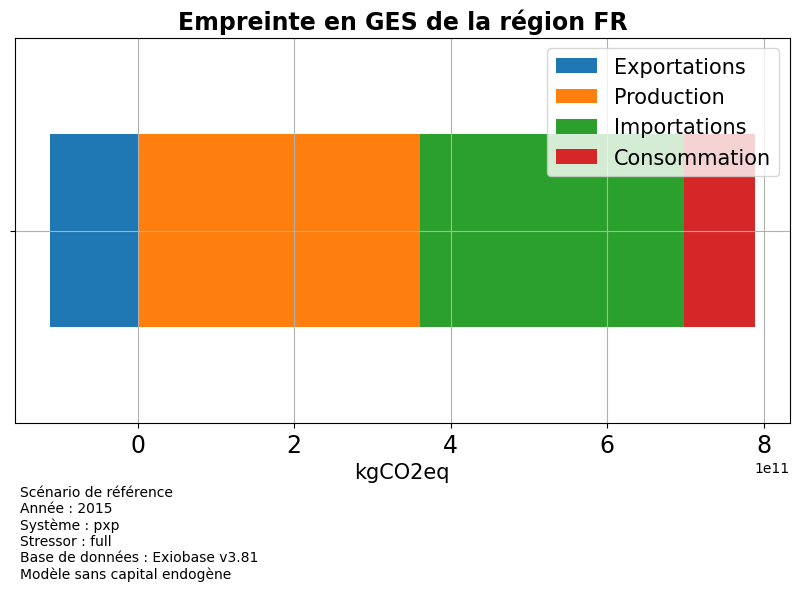

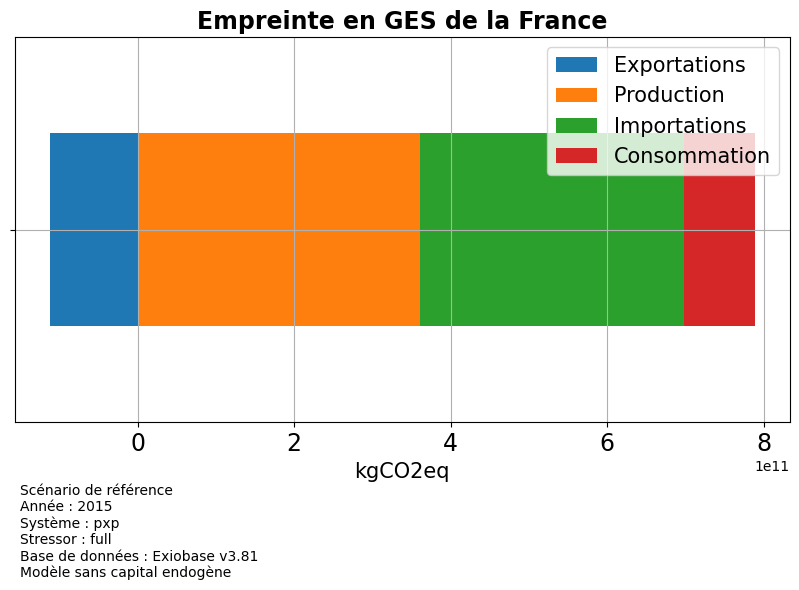

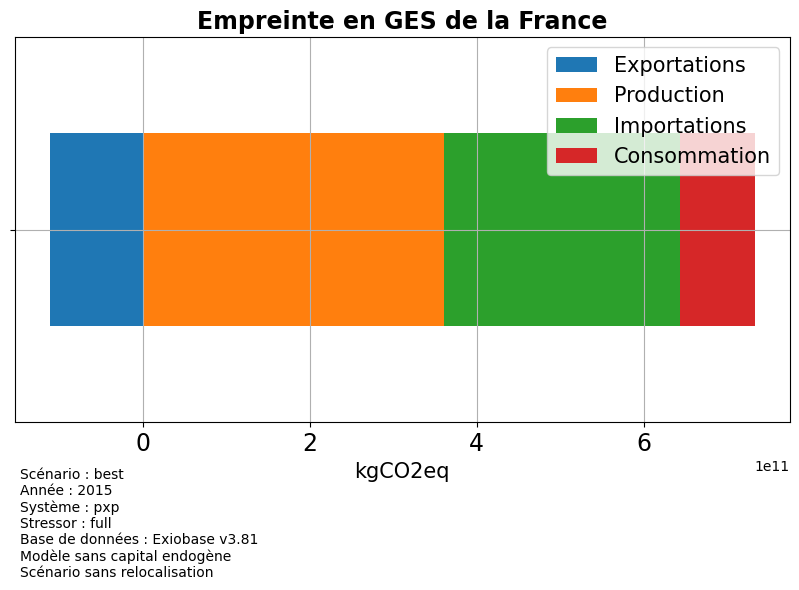

In [79]:
model.plot_footprint(region="FR", stressors_to_display='GES')
model.plot_footprint_FR(stressors_to_display='GES')
model.plot_footprint_FR(counterfactual_name="best", stressors_to_display='GES')

La méthode `plot_stressor_content_heatmap` permet d'avoir une vision globale de l'intensité en stressors des différents secteurs dans chaque région. L'argument `prod` détermine la variable représentée: impacts directs de la production si `prod`=True (variable S, correspondant au "scope 1"), empreinte si `prod`=False (variable M = S\*L, correspondant au "scope 3"). L'intensité de chaque secteur/produit dans chaque région est traduite dans l'échelle de couleur par rapport à la région la plus polluante (100%).

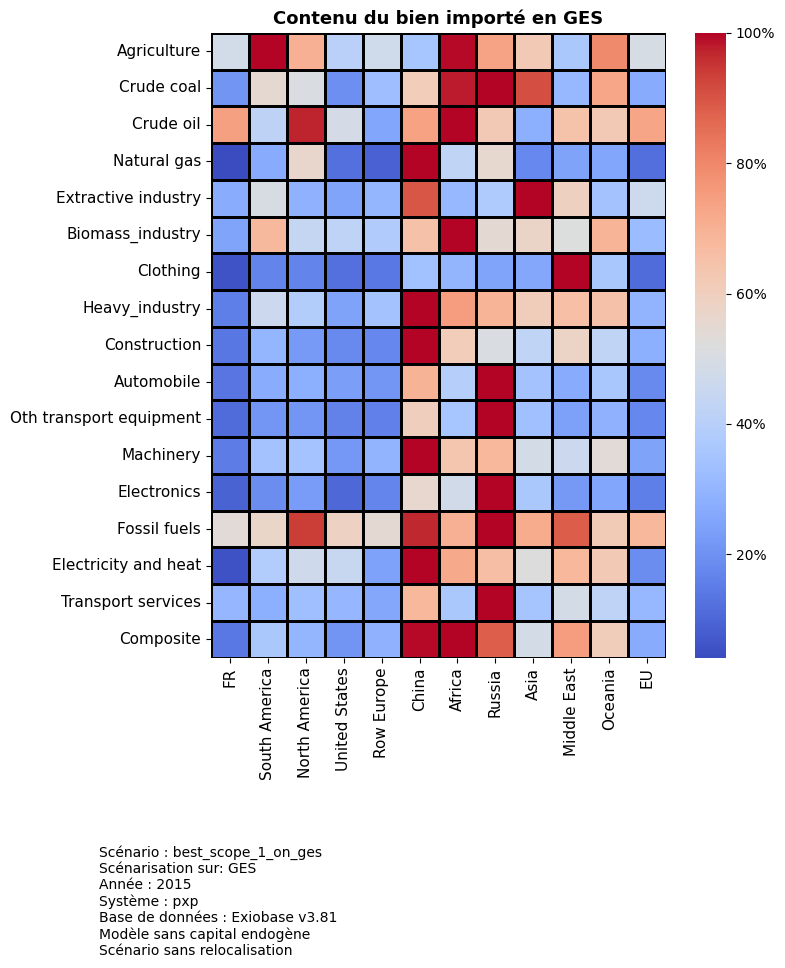

In [32]:
model.plot_stressor_content_heatmap(counterfactual_name="best_scope_1_on_ges", stressors_to_display='GES', prod = False)

La méthode `plot_stressor_content_production()` permet de comparer les intensités en stressors de la production de chaque région pour chaque secteur.

**NB: Pour ces quatre méthodes précédentes**, sans scénario spécifié en argument, on représente par défaut la référence.

Exemple:

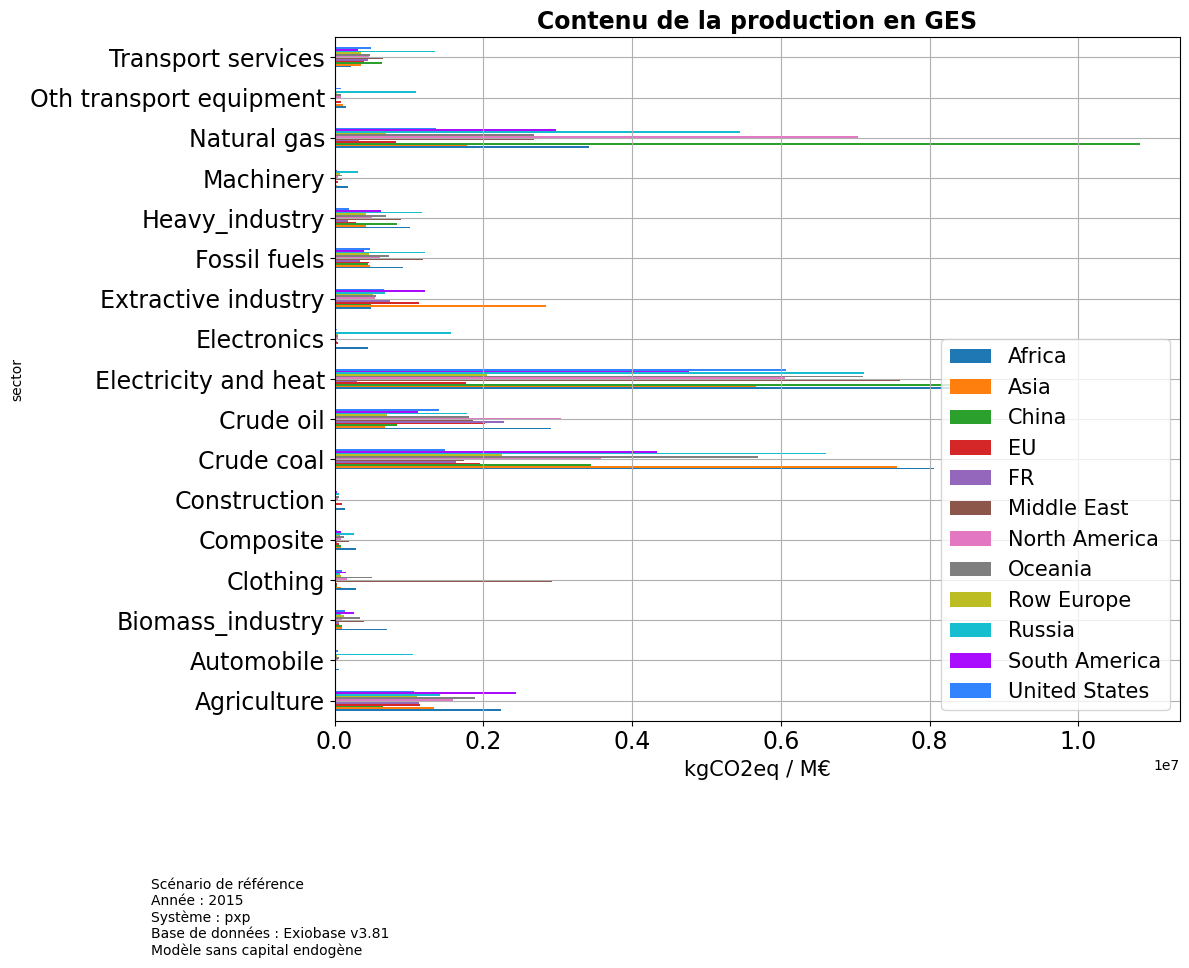

In [33]:
model.plot_stressor_content_production(stressors_to_display='GES')

La méthode `footprint_extractor` permet d'afficher les valeurs numériques des composantes de l'empreinte agréréepar sur les stressors et régions.

In [ ]:
from src.utils import footprint_extractor
print(footprint_extractor(model,"FR"))
print(footprint_extractor(model.counterfactuals["best"],"FR"))
print(footprint_extractor(model.counterfactuals["best_scope_1"],"FR"))

Les méthodes `plot_trade_synthesis`, `plot_stressor_synthesis` et `plot_substressor_synthesis` tracent chacune plusieurs graphiques permettant d'avoir une vision globale des différences entre un scénario donné et la référence concernant respectivement, pour chaque origine d'approvisionnement:
   - les flux d'importation de chaque produit (en unité monétaire),
   - le détail de l'impact par secteur,
   - le détail de l'impact par stressor.

Pour les importations monétaires et pour chaque composante de l'empreinte (empreinte totale/impact territorial/empreinte importée/empreinte exportée), chaque méthode renvoie trois figures: le total agrégé pour le groupe de stressors, ainsi que deux histogrammes (en valeur absolue et en 100% quand c'est possible) pour le détail par secteur ou par stressor.

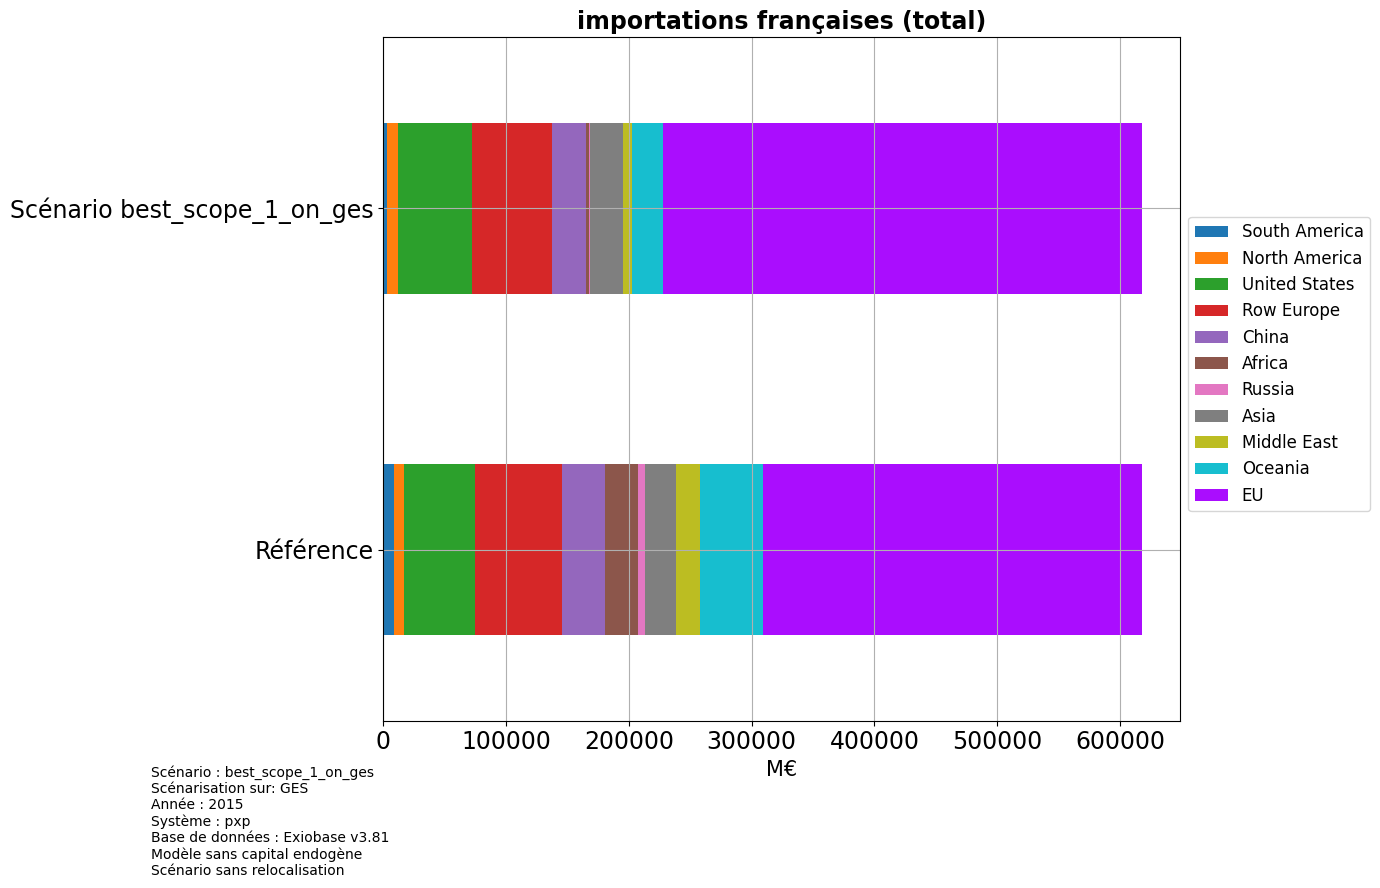

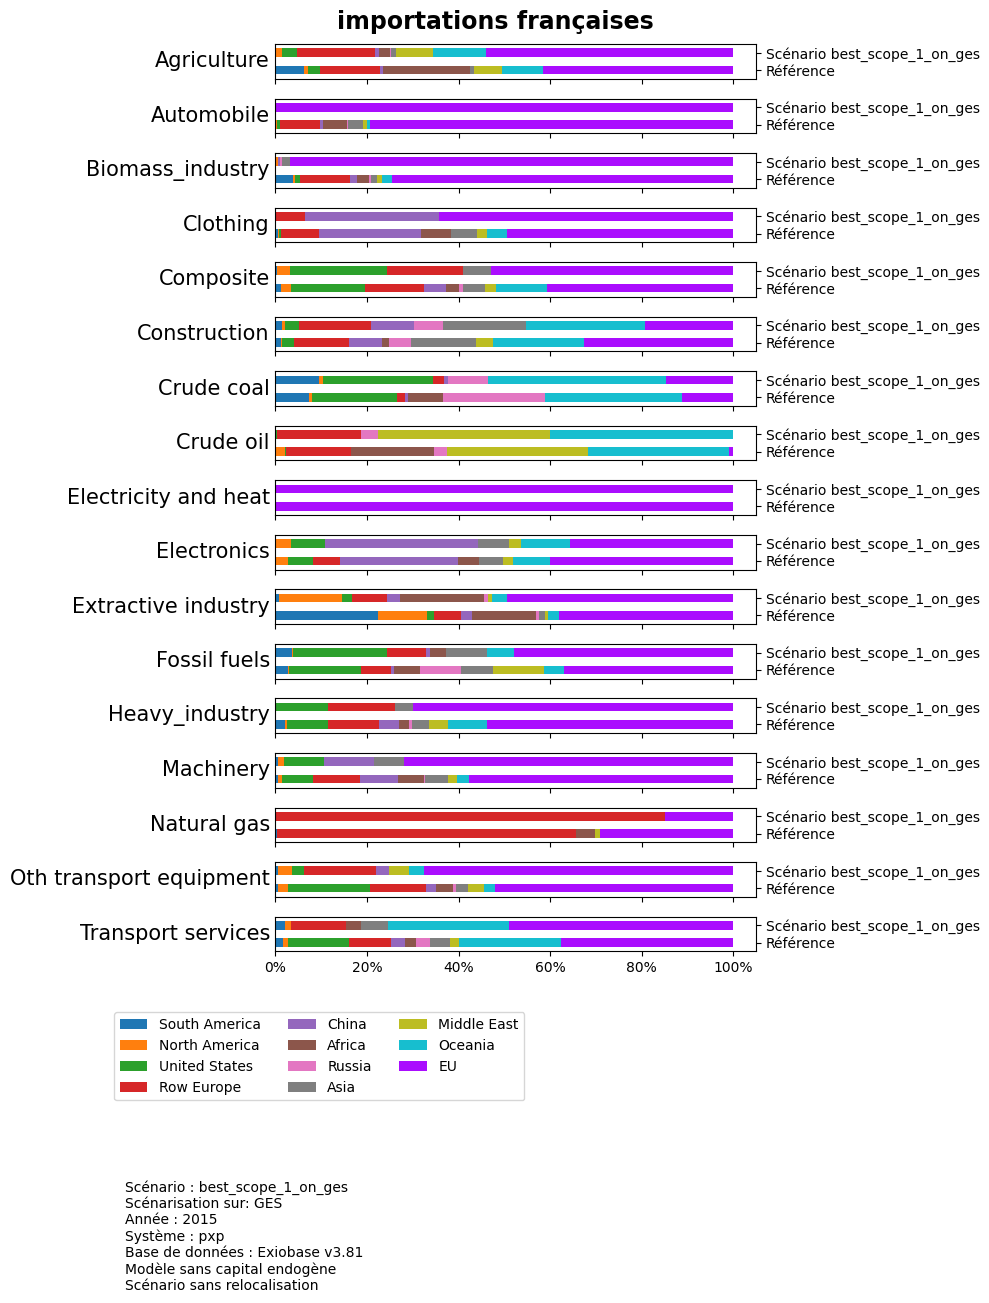

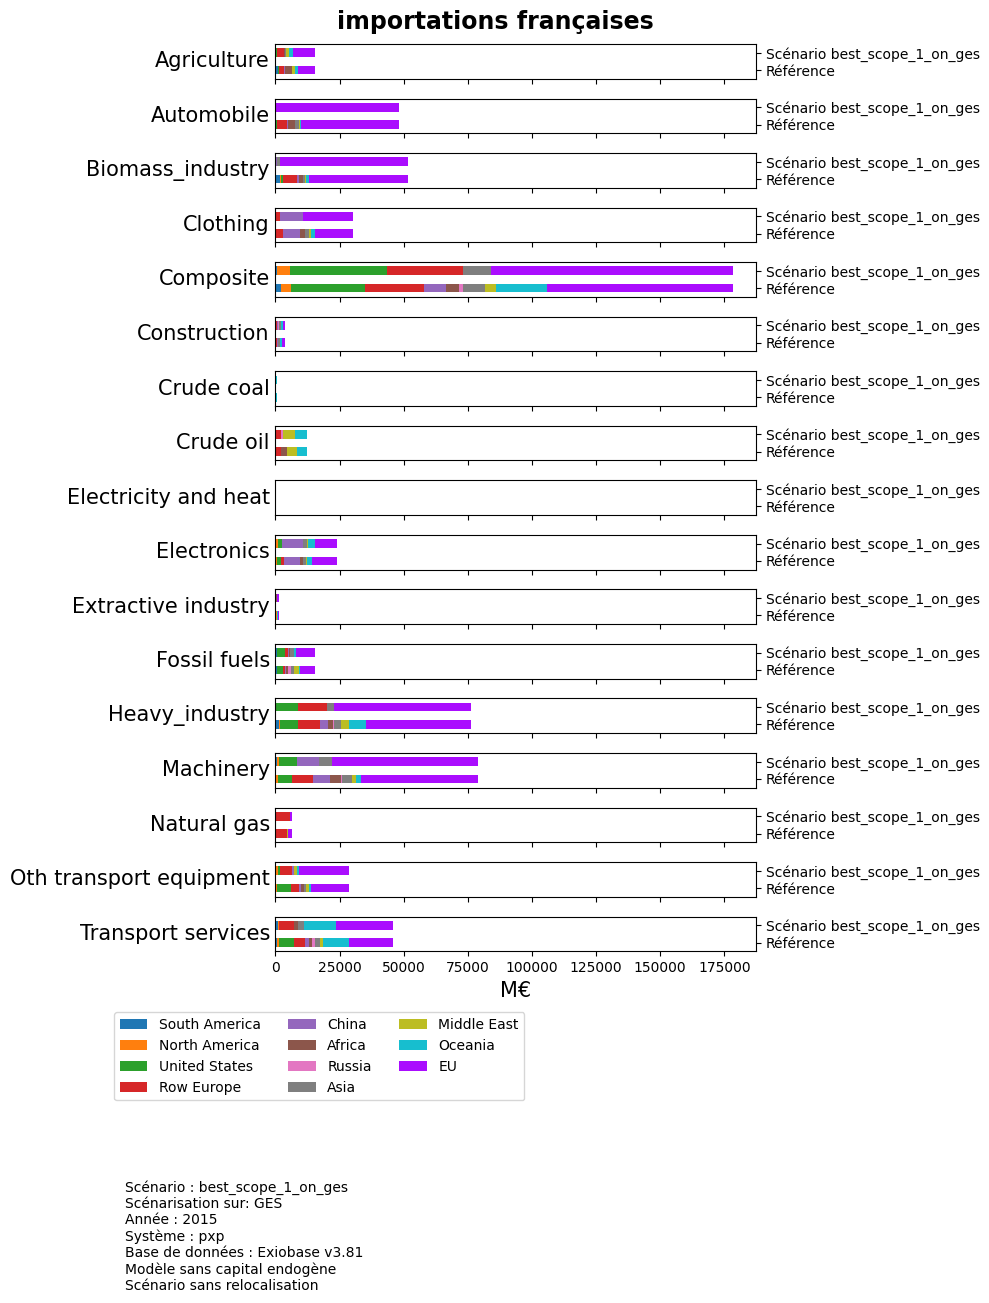

In [5]:
model.plot_trade_synthesis("best_scope_1_on_ges")

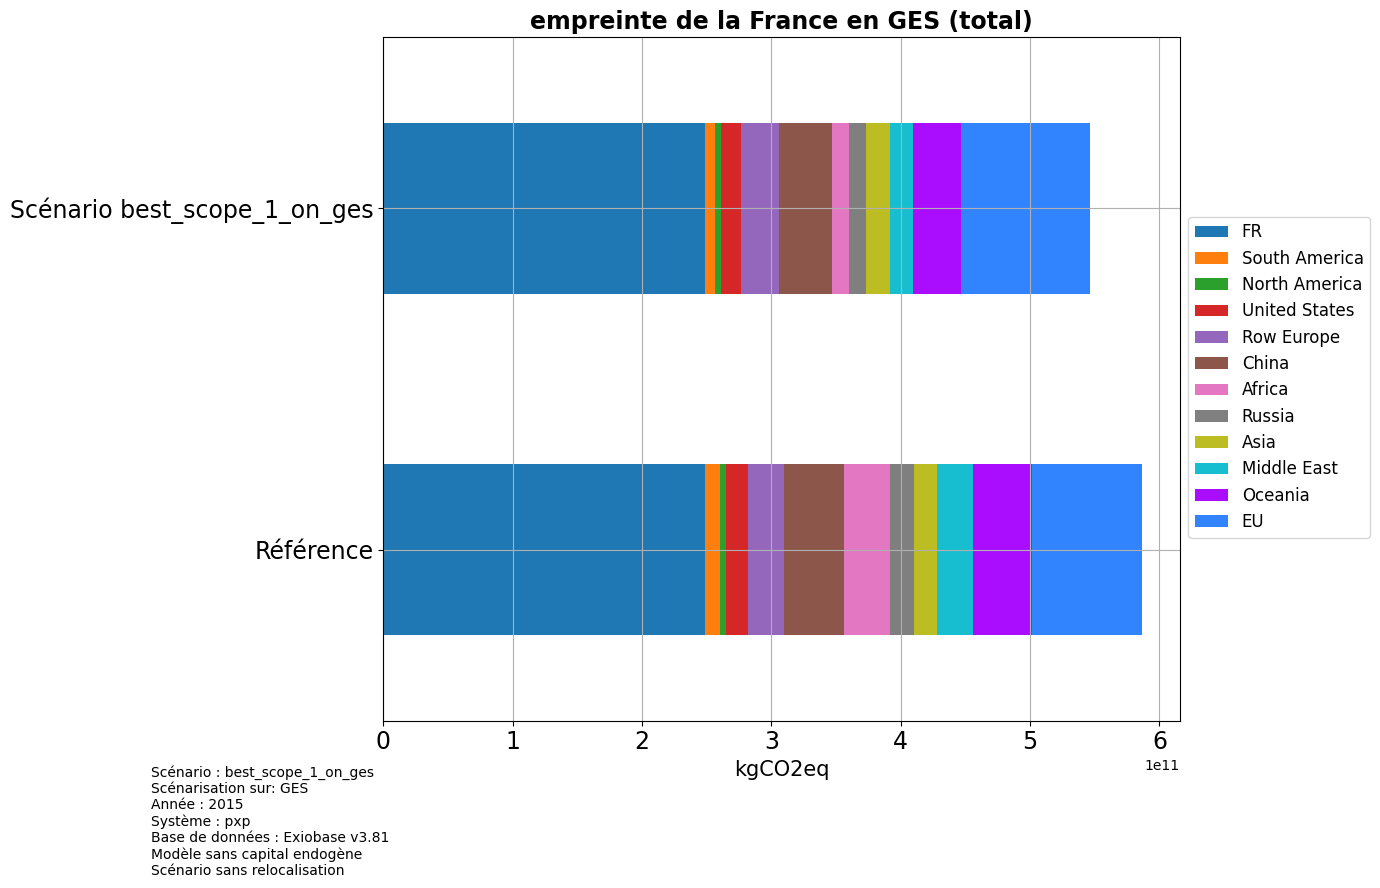

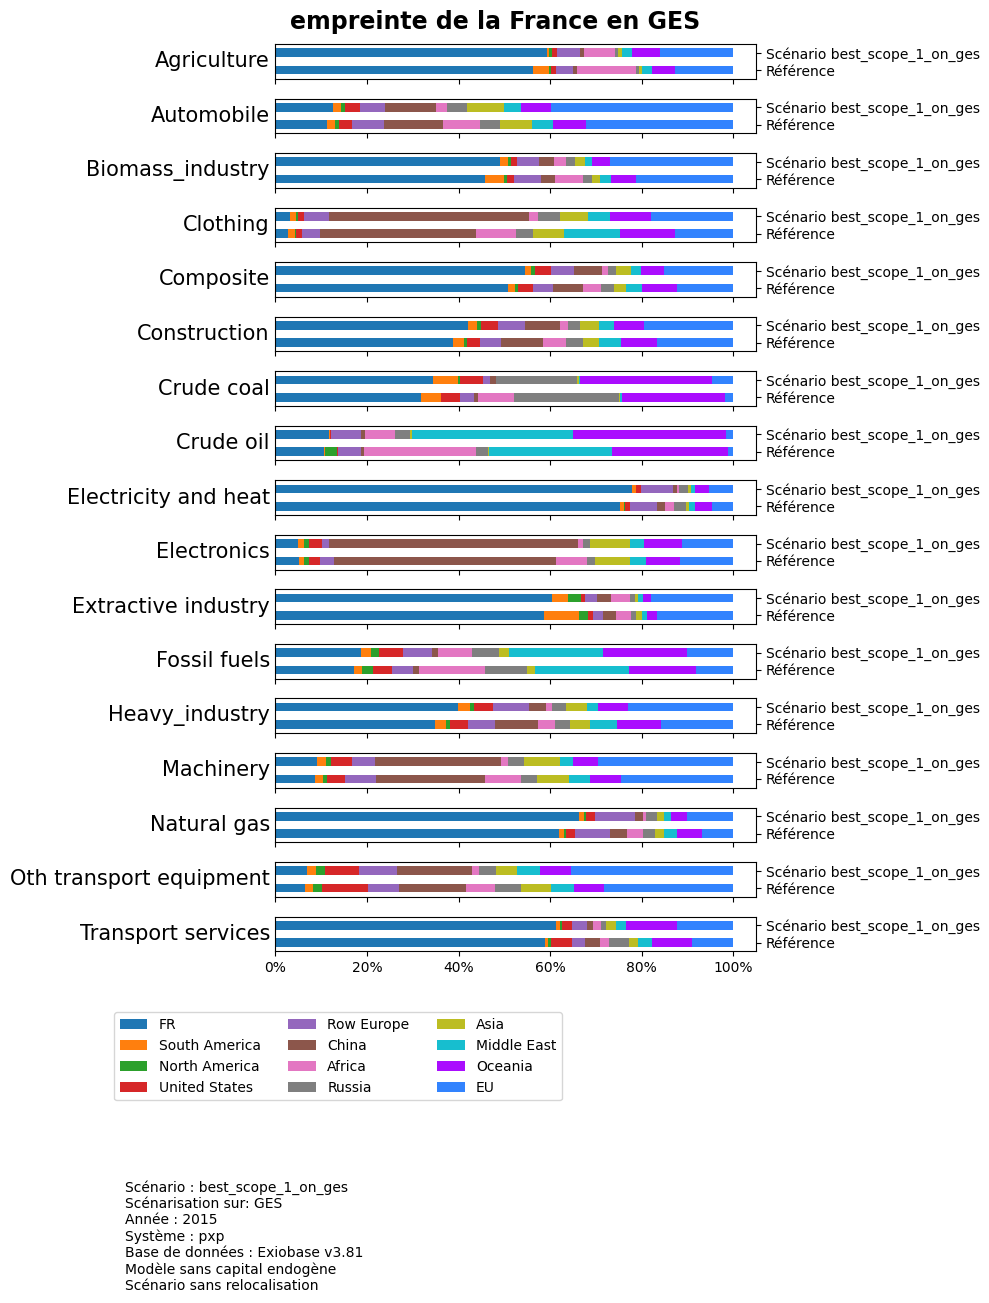

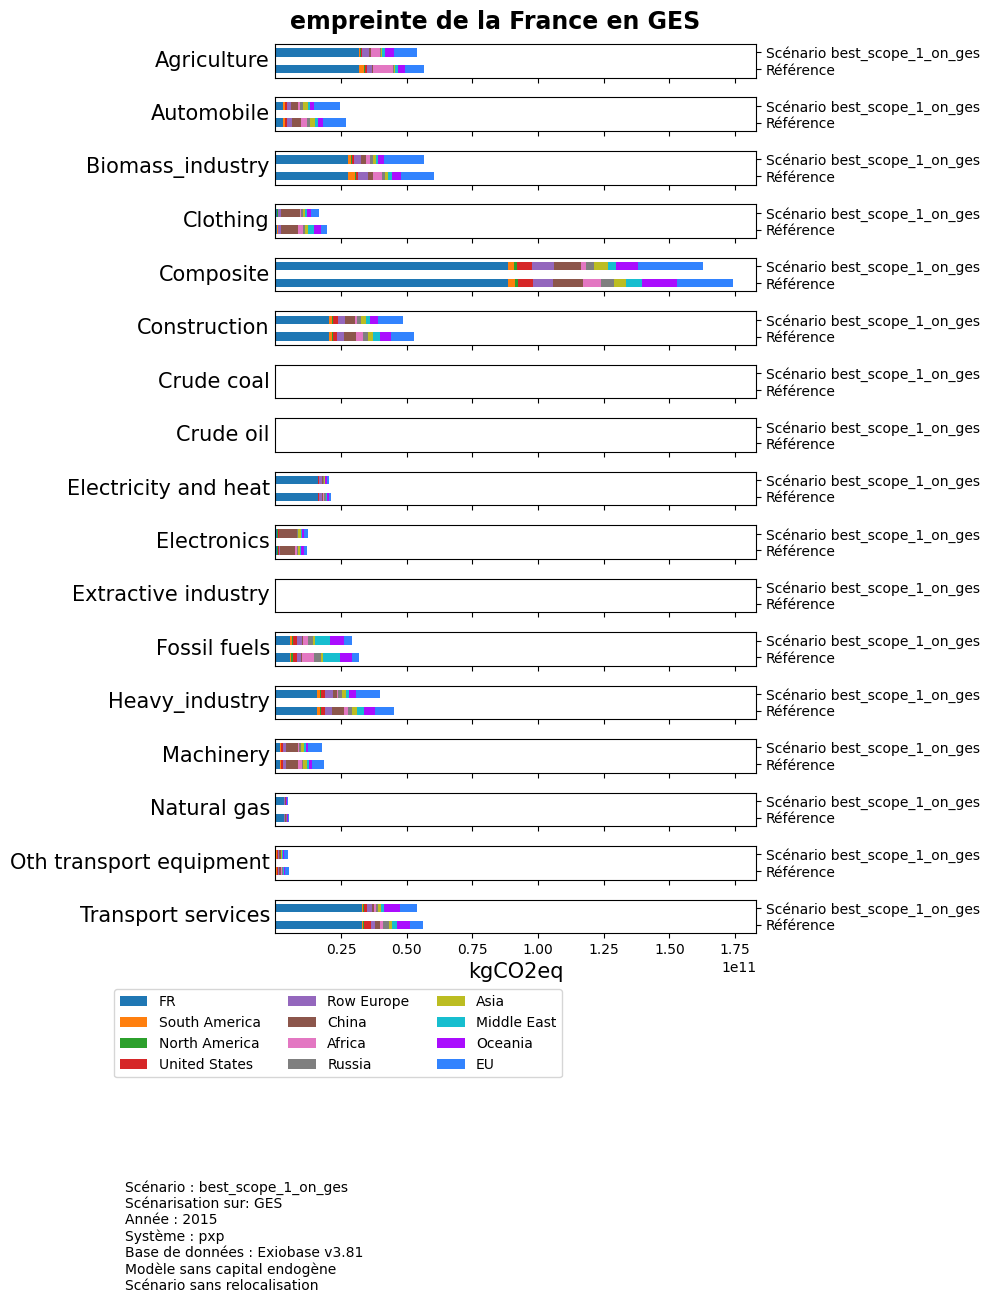

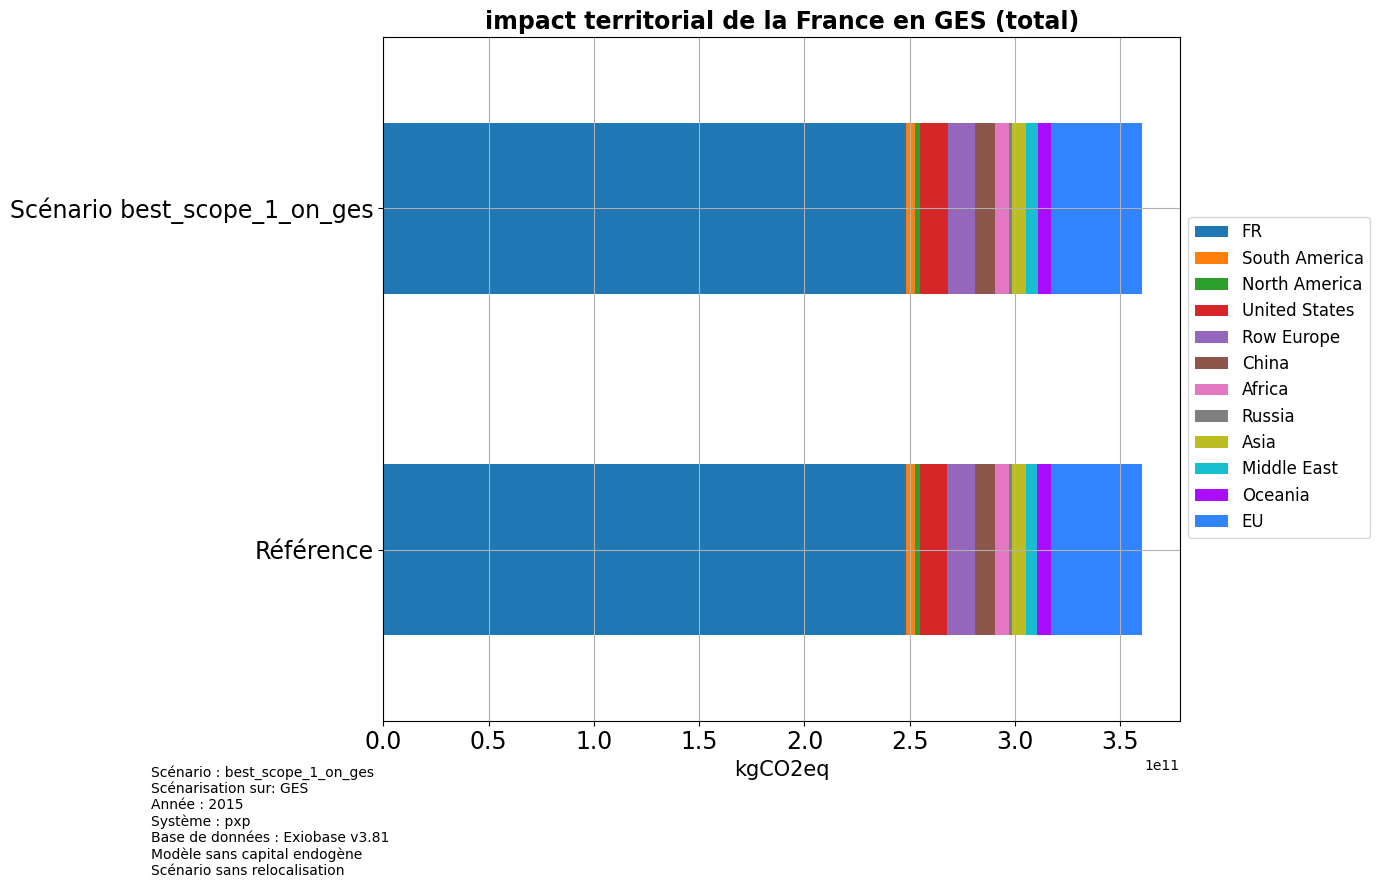

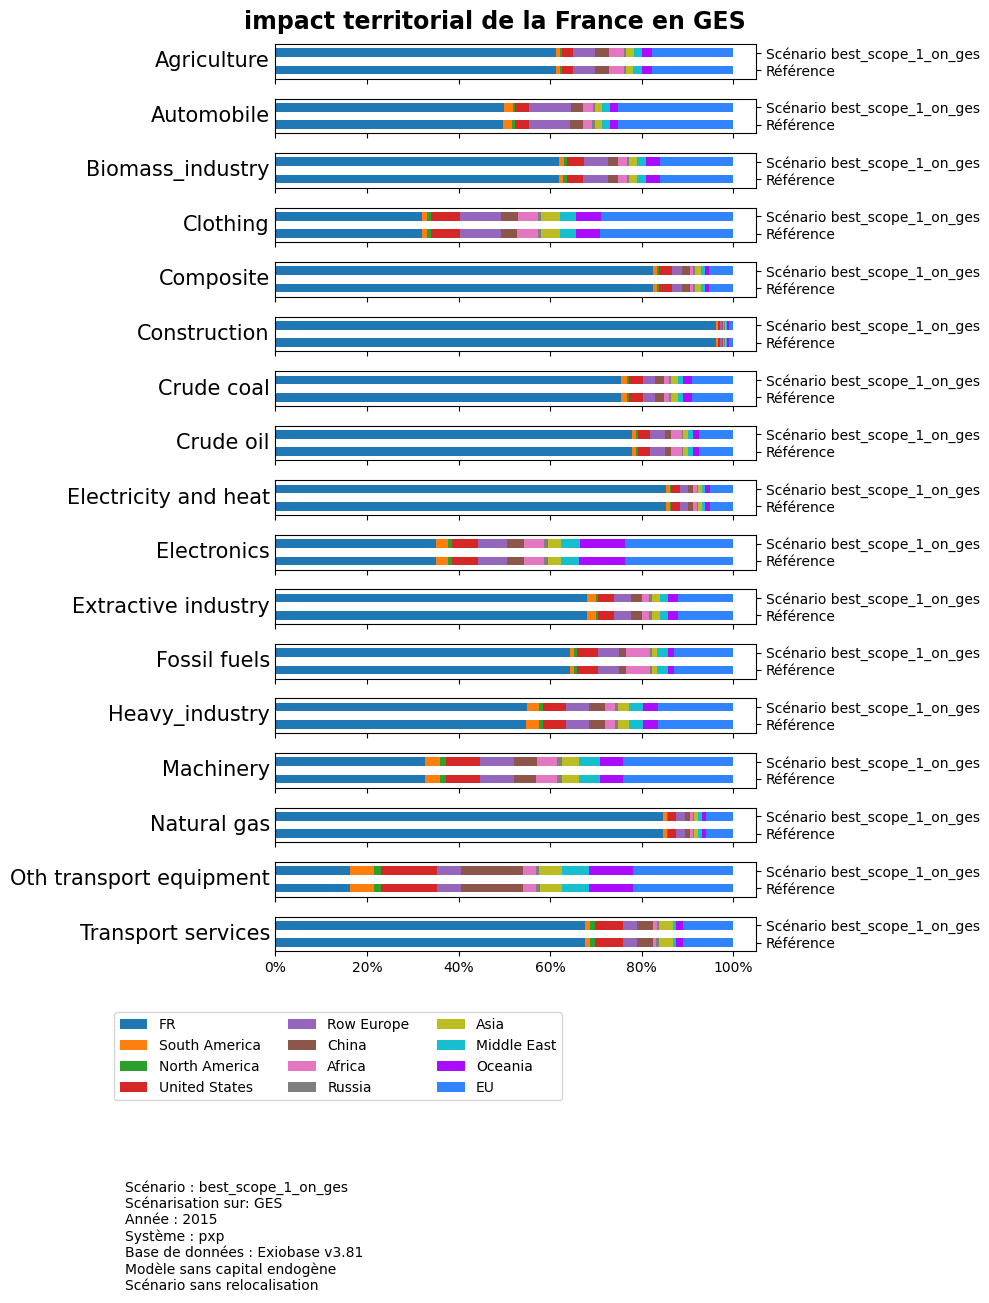

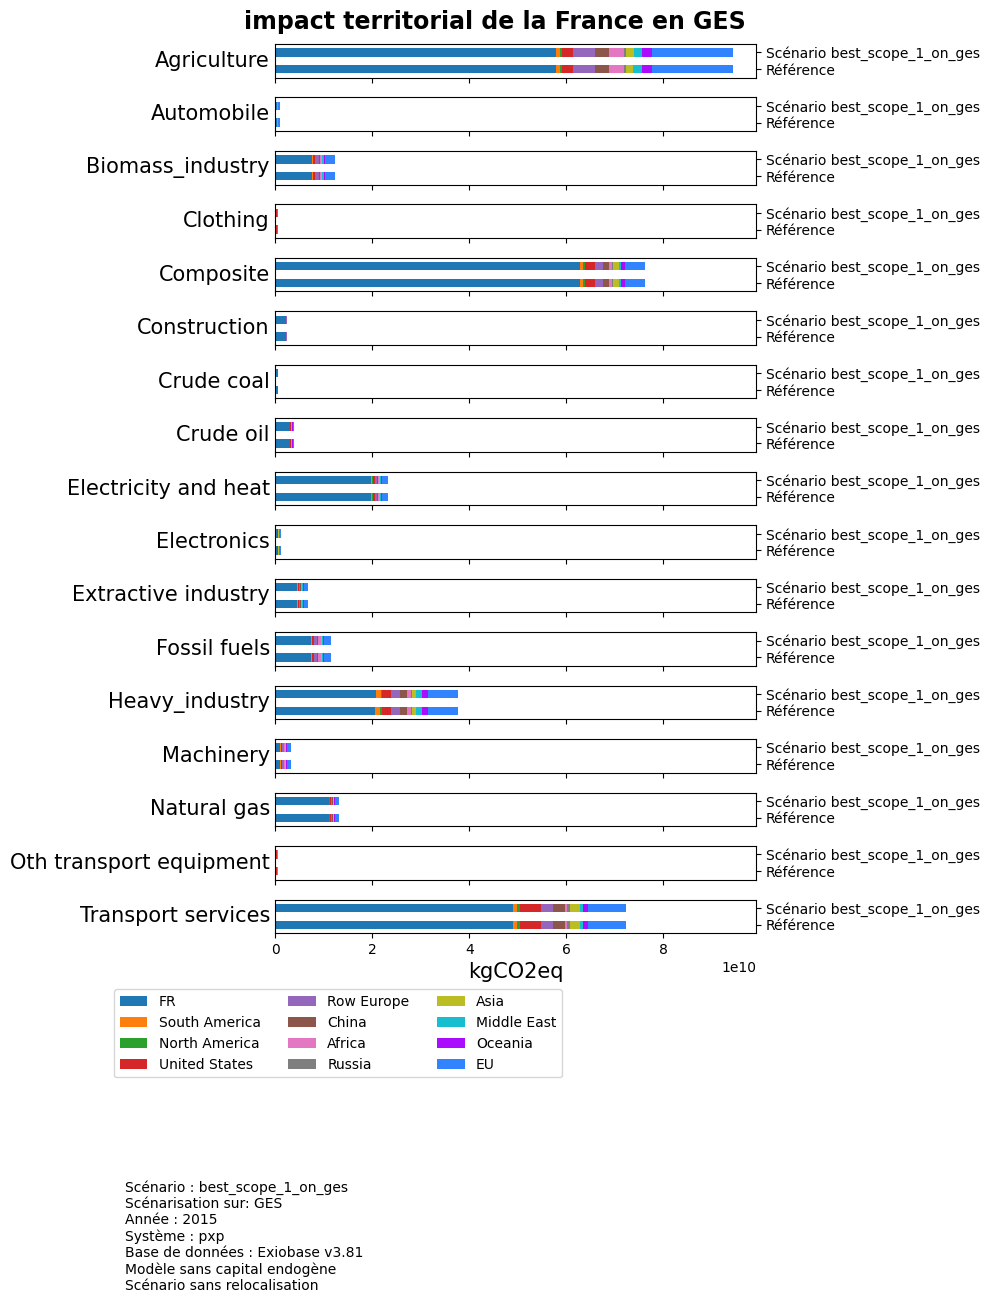

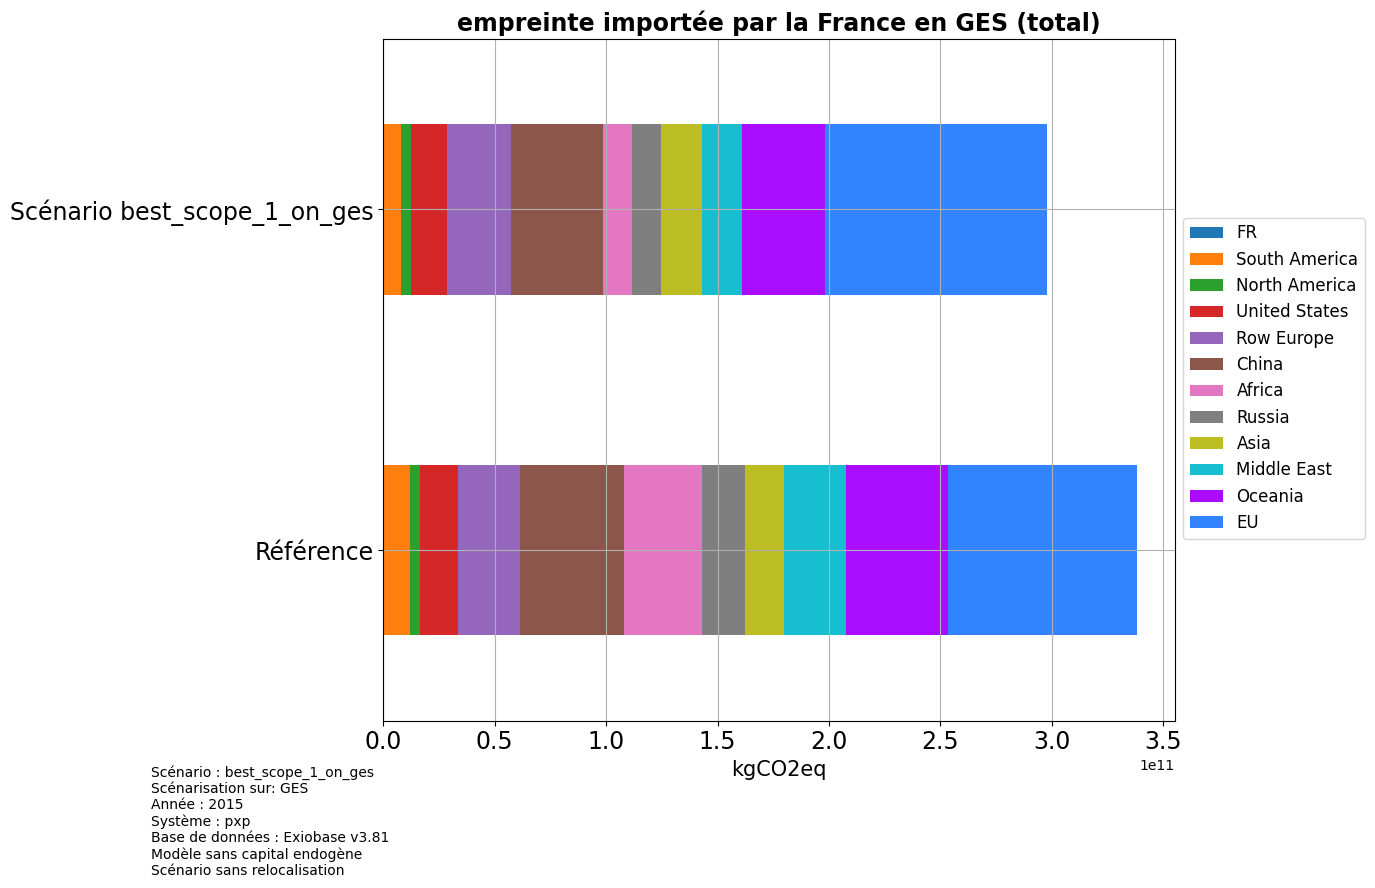

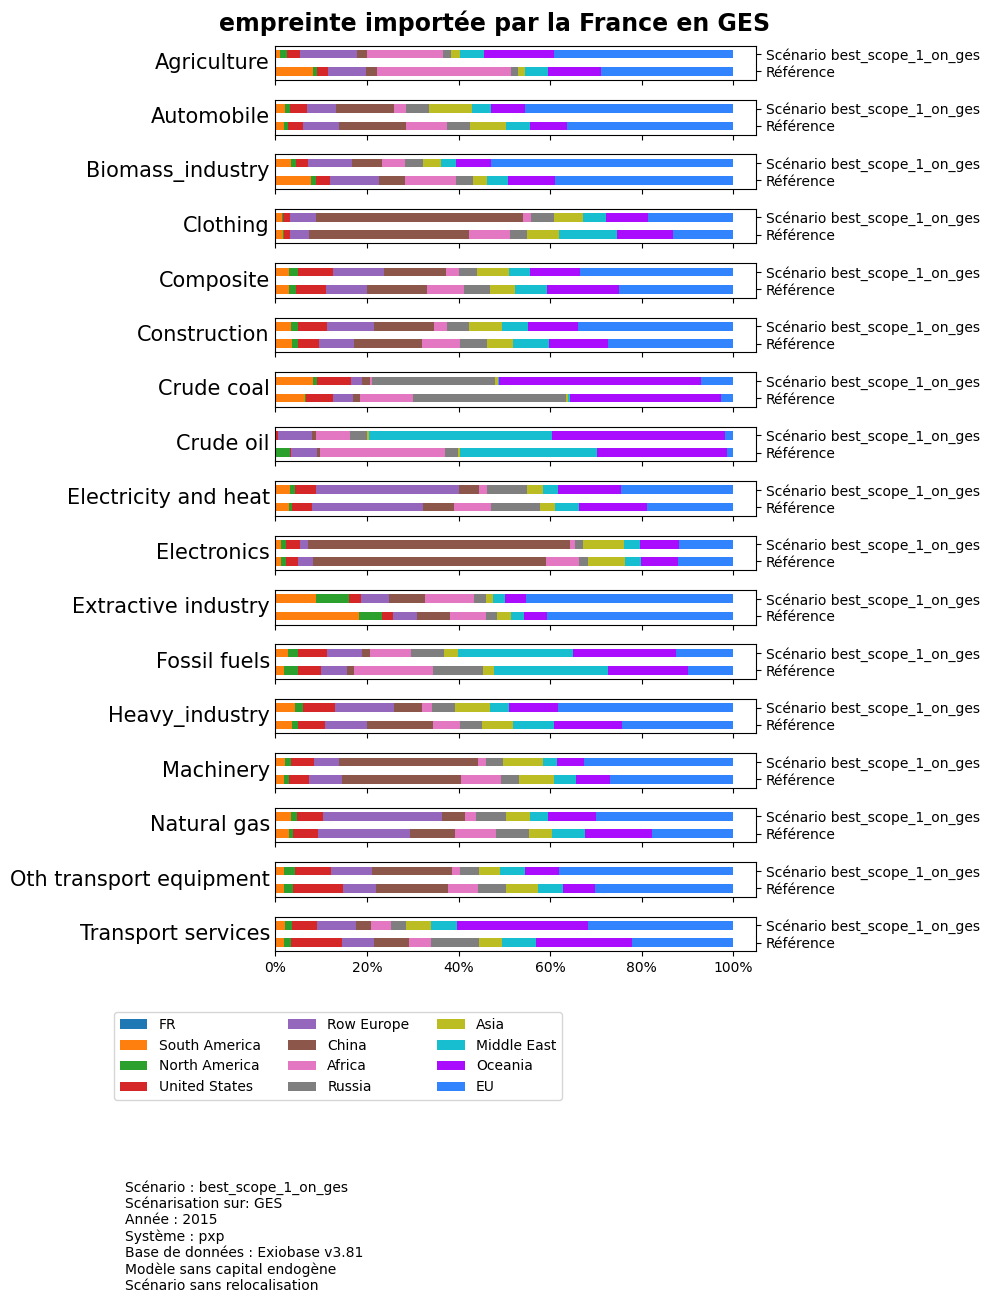

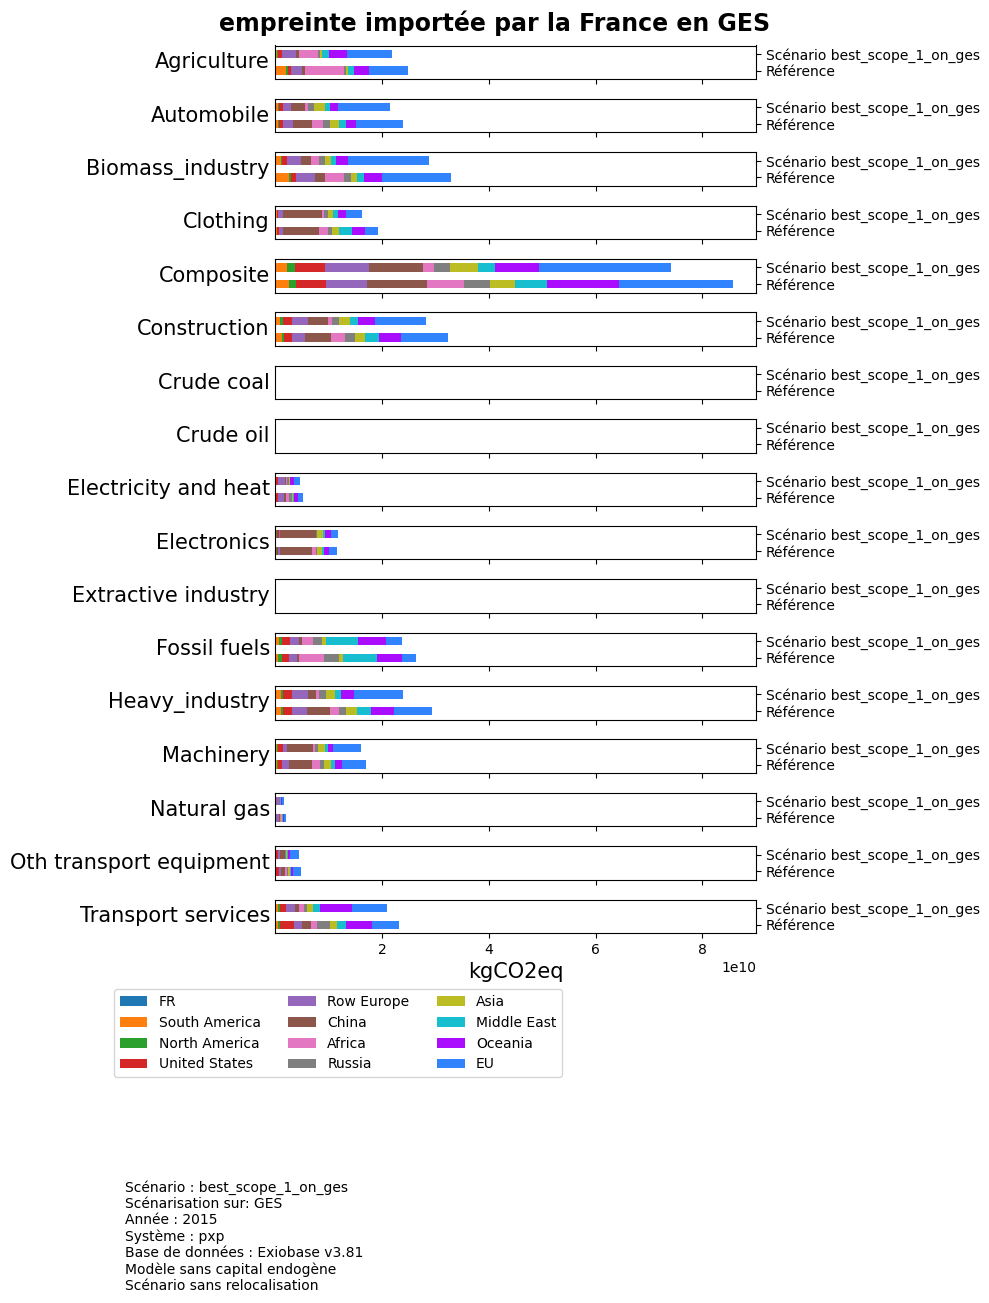

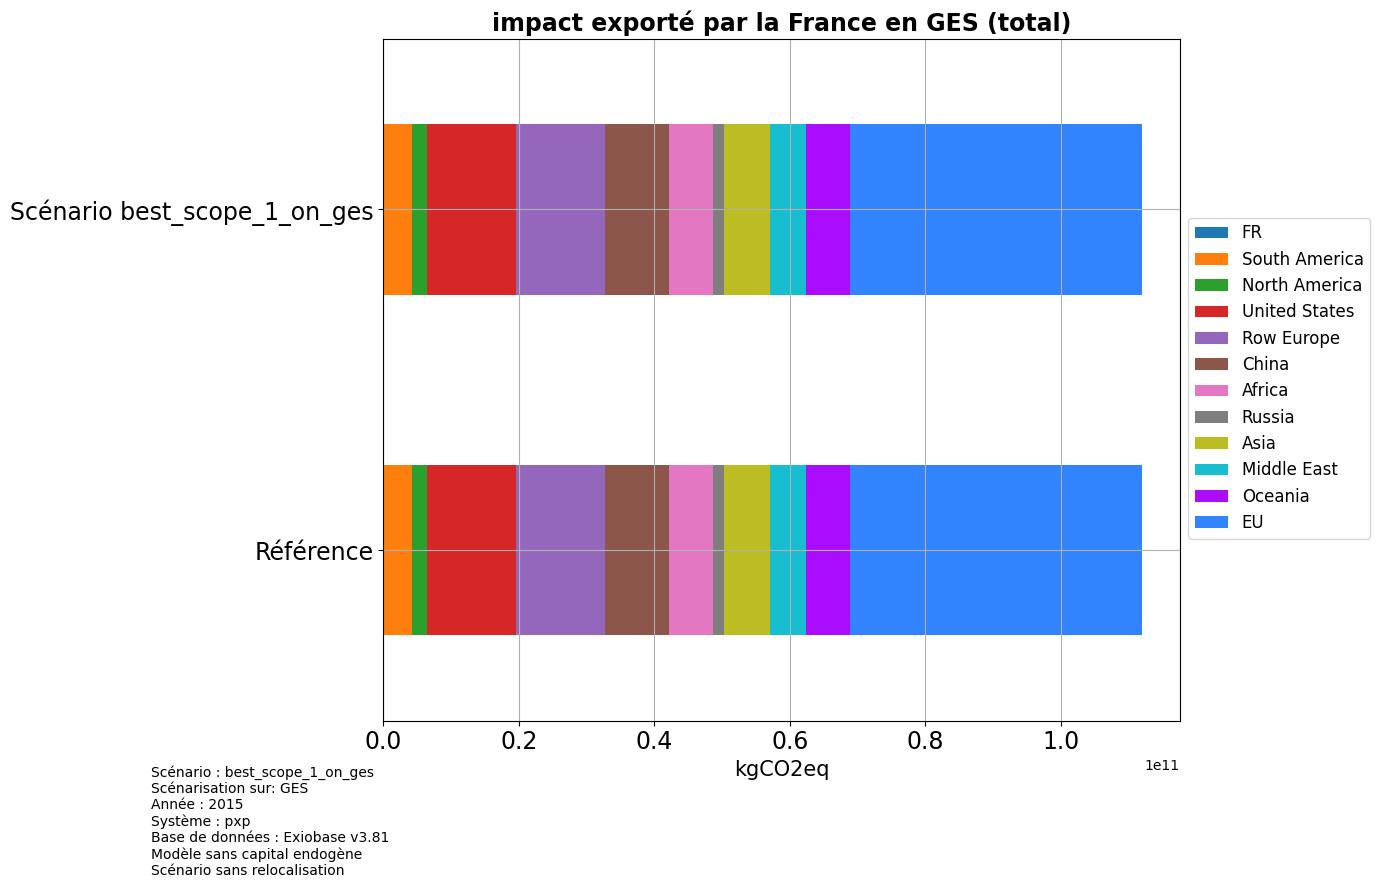

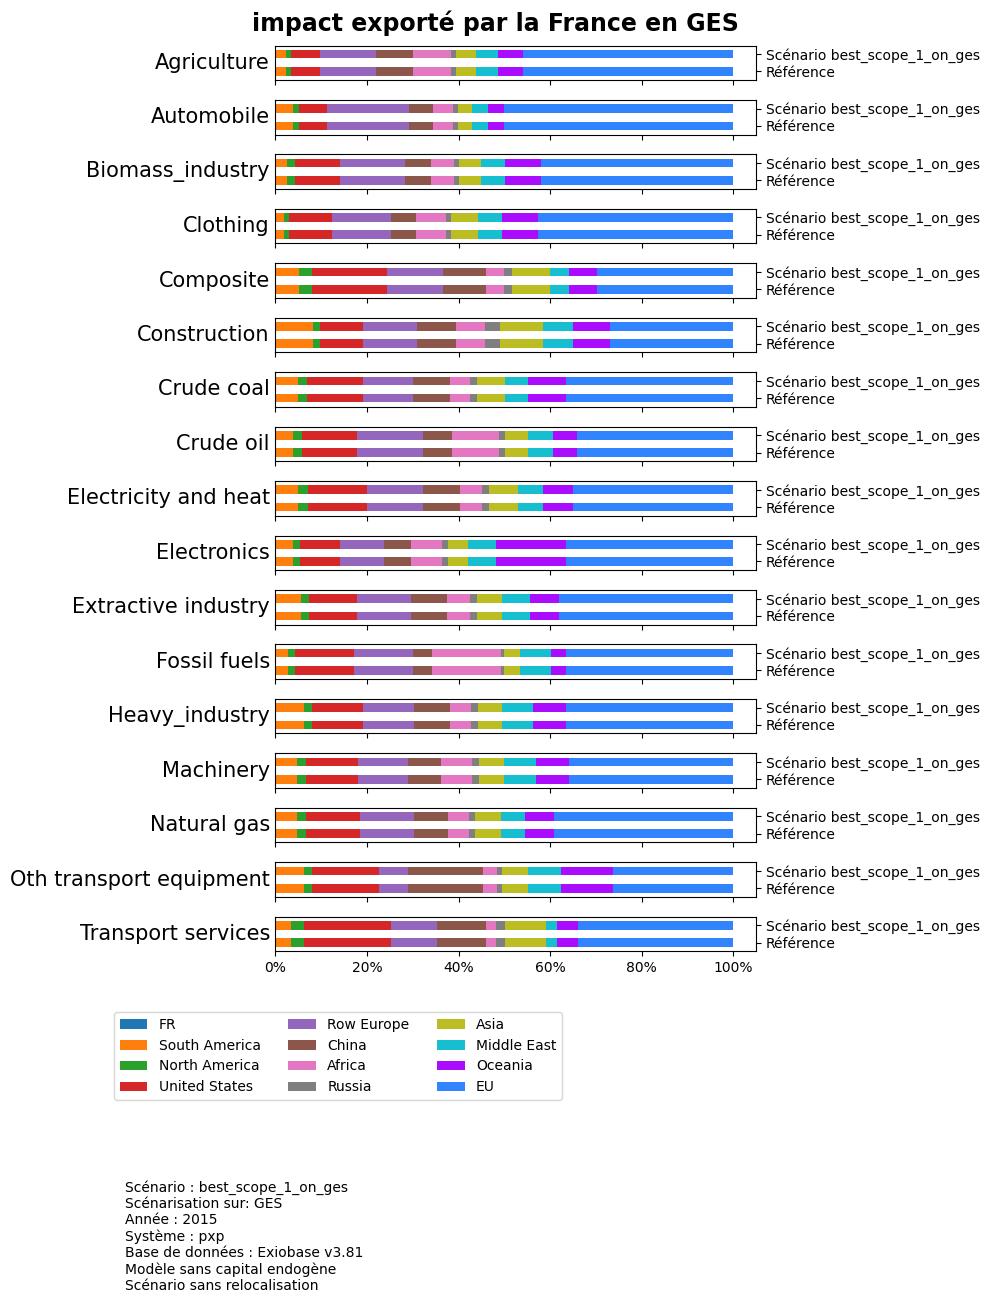

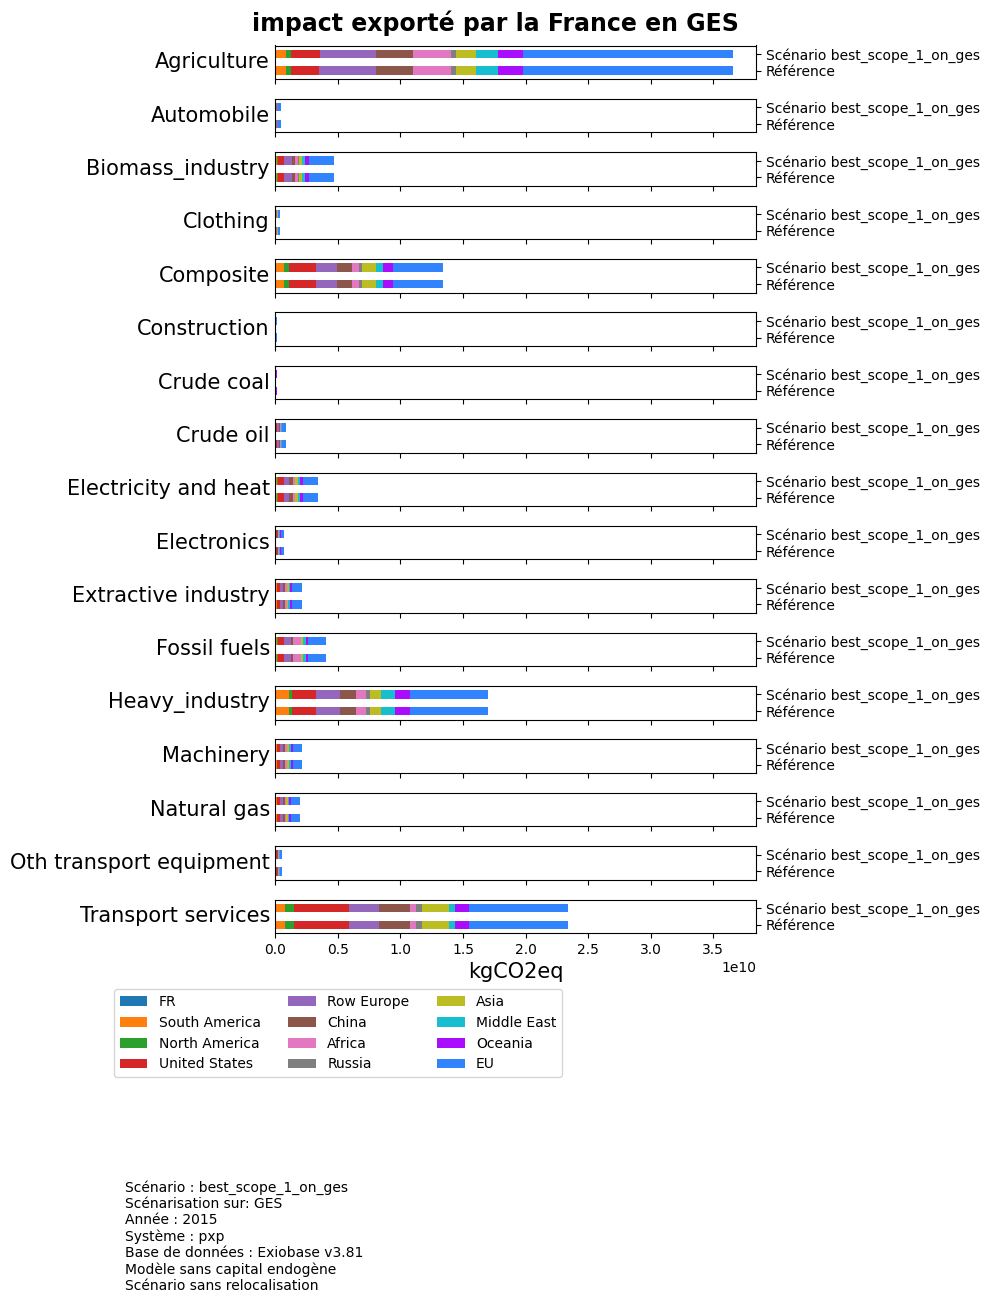

In [34]:
model.plot_stressor_synthesis("best_scope_1_on_ges", stressors_to_display='GES')

Le code python crée par défaut pour chaque modèle une arborescence de dossiers dans le dossier `figures`/{modele}/{counterfactuals}/{accounts}, permettant ensuite d'enregistrer facilement "à la main" une figure (par exemple depuis le notebook). 

Le paramètre `save_figures` permet de d'autoriser la savegarde automatique des figures lors du lancement d'une fonction de représentation graphique. 

In [30]:
model.save_figures = True

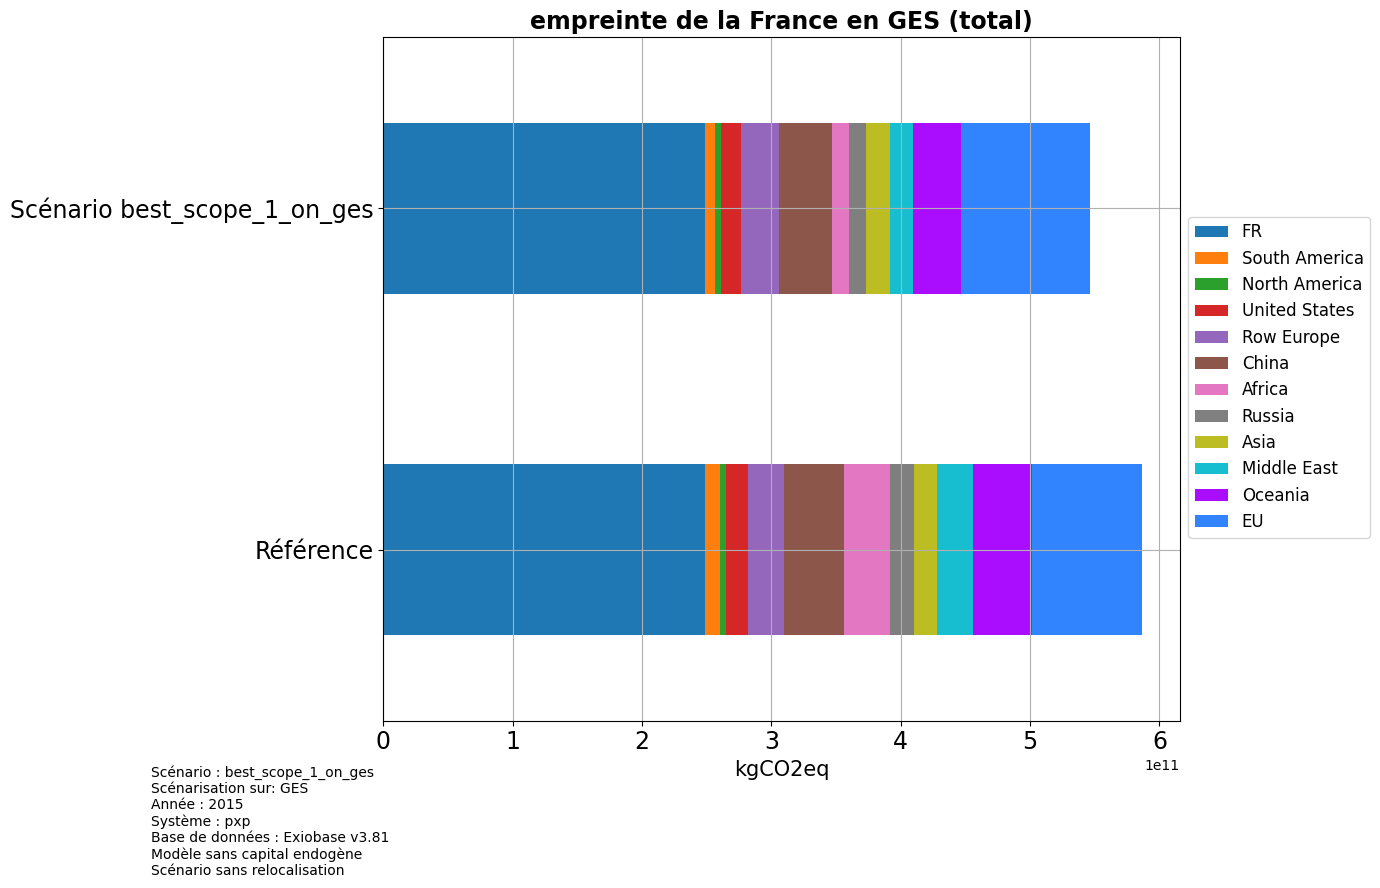

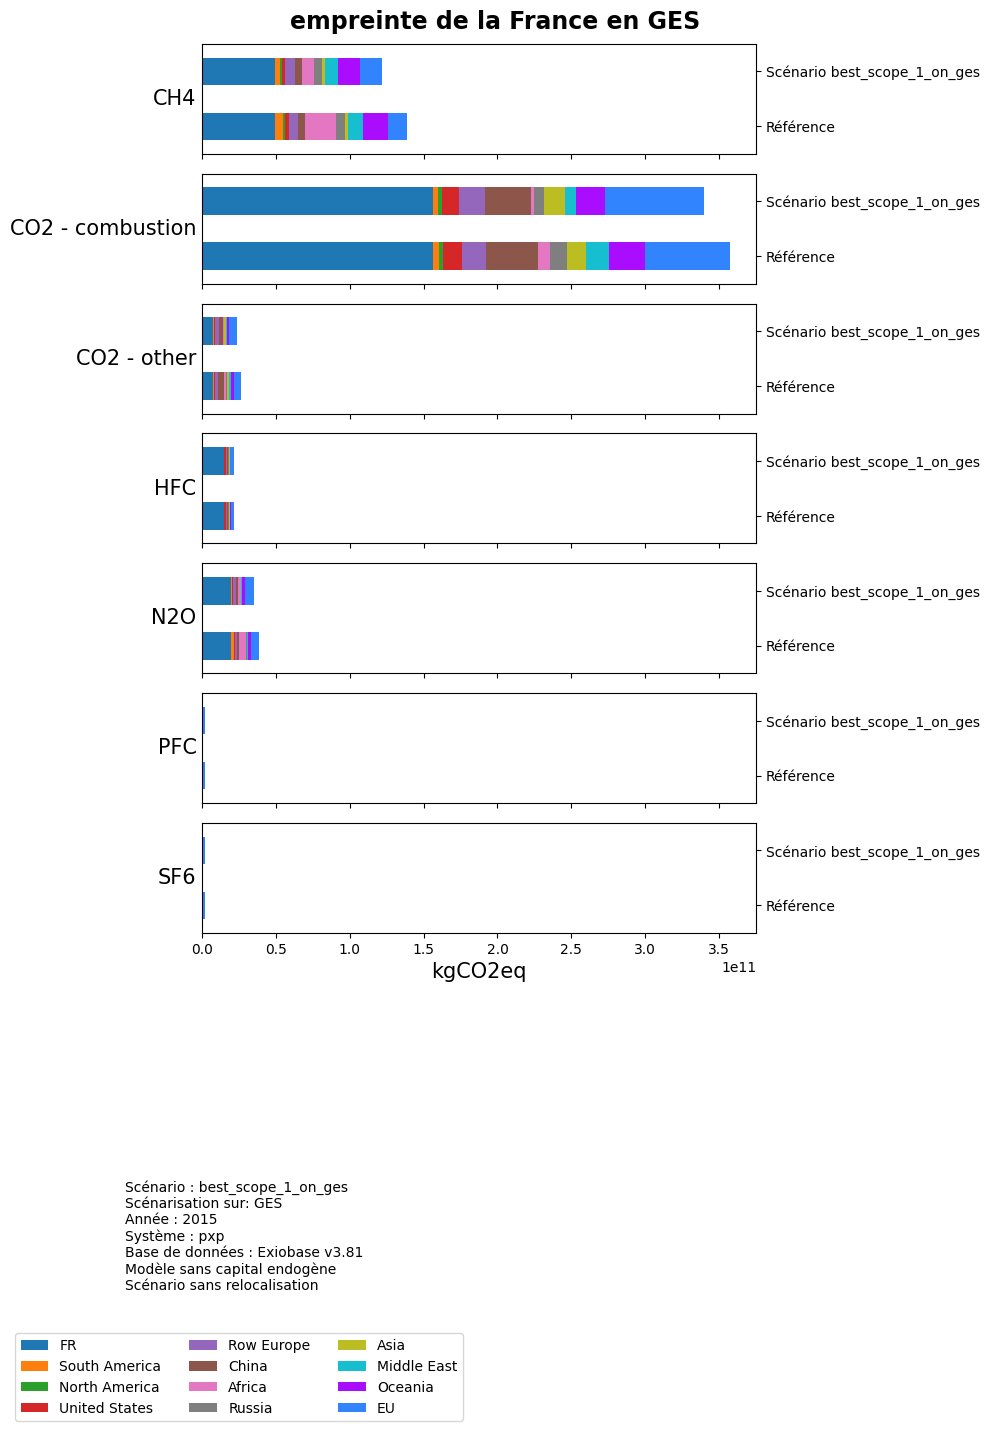

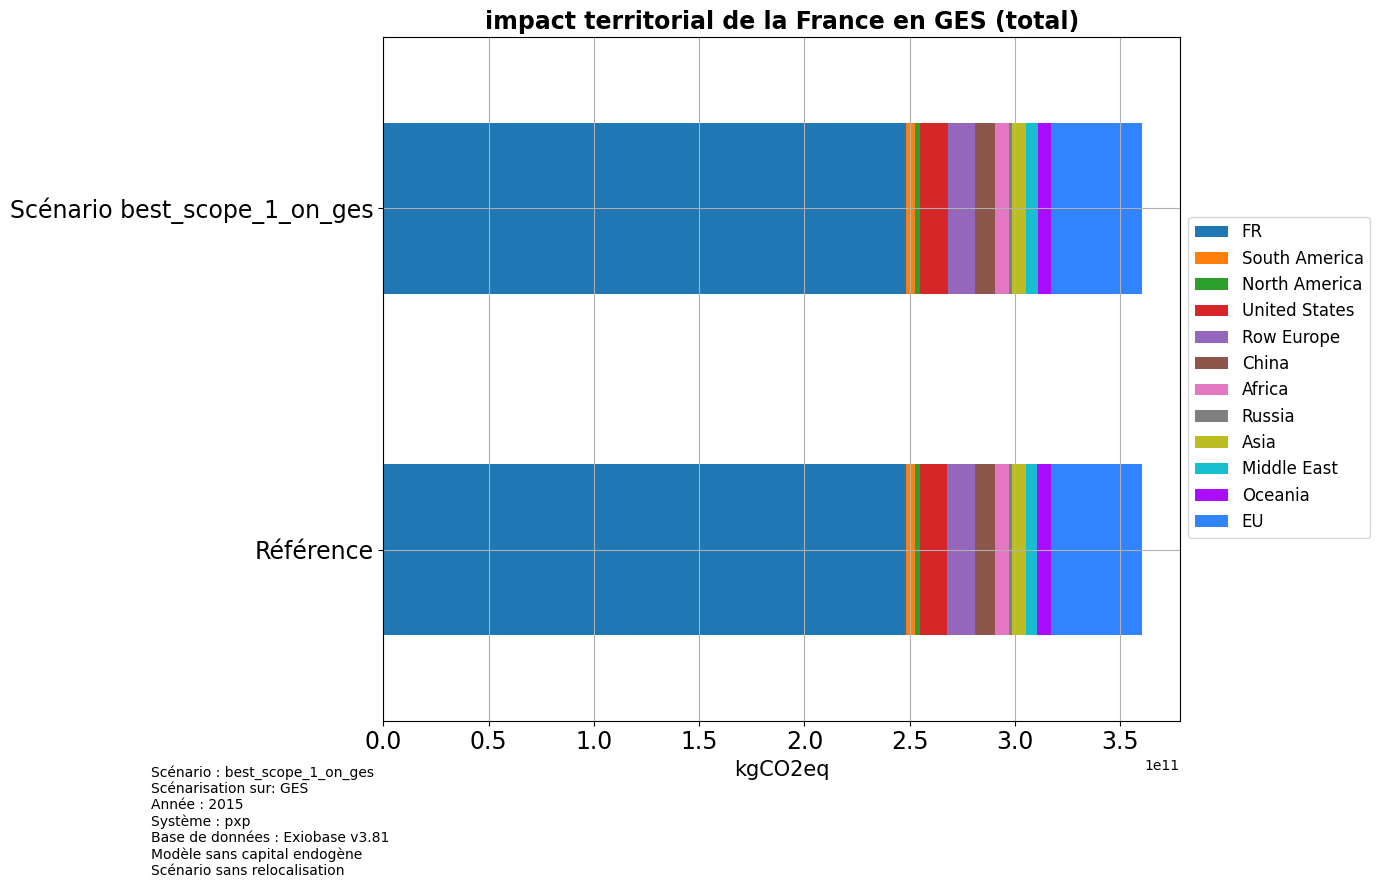

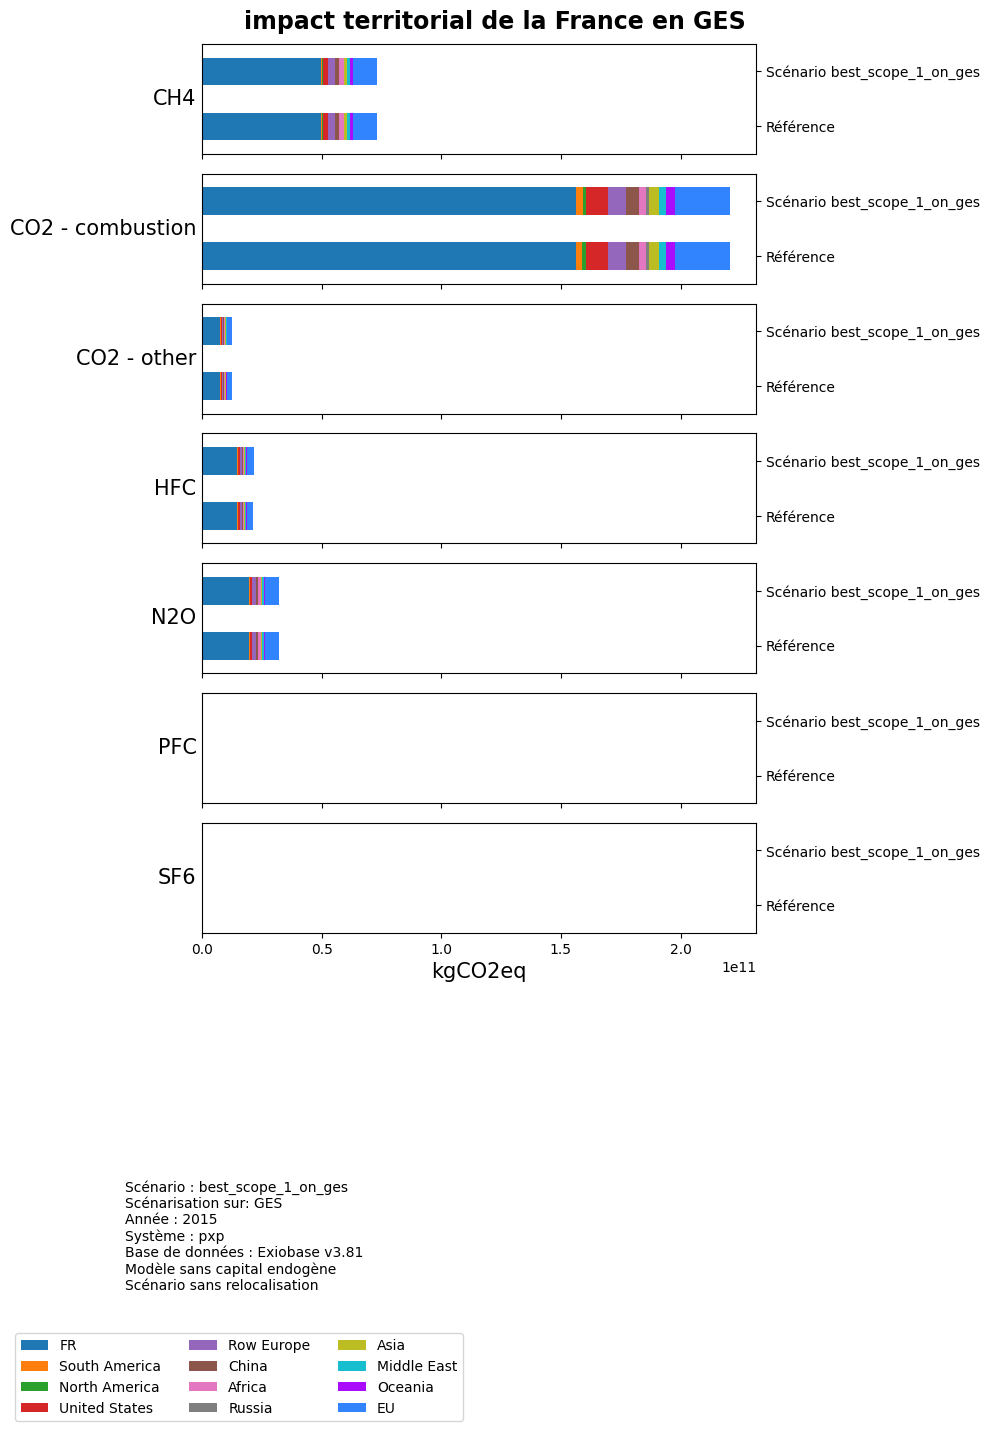

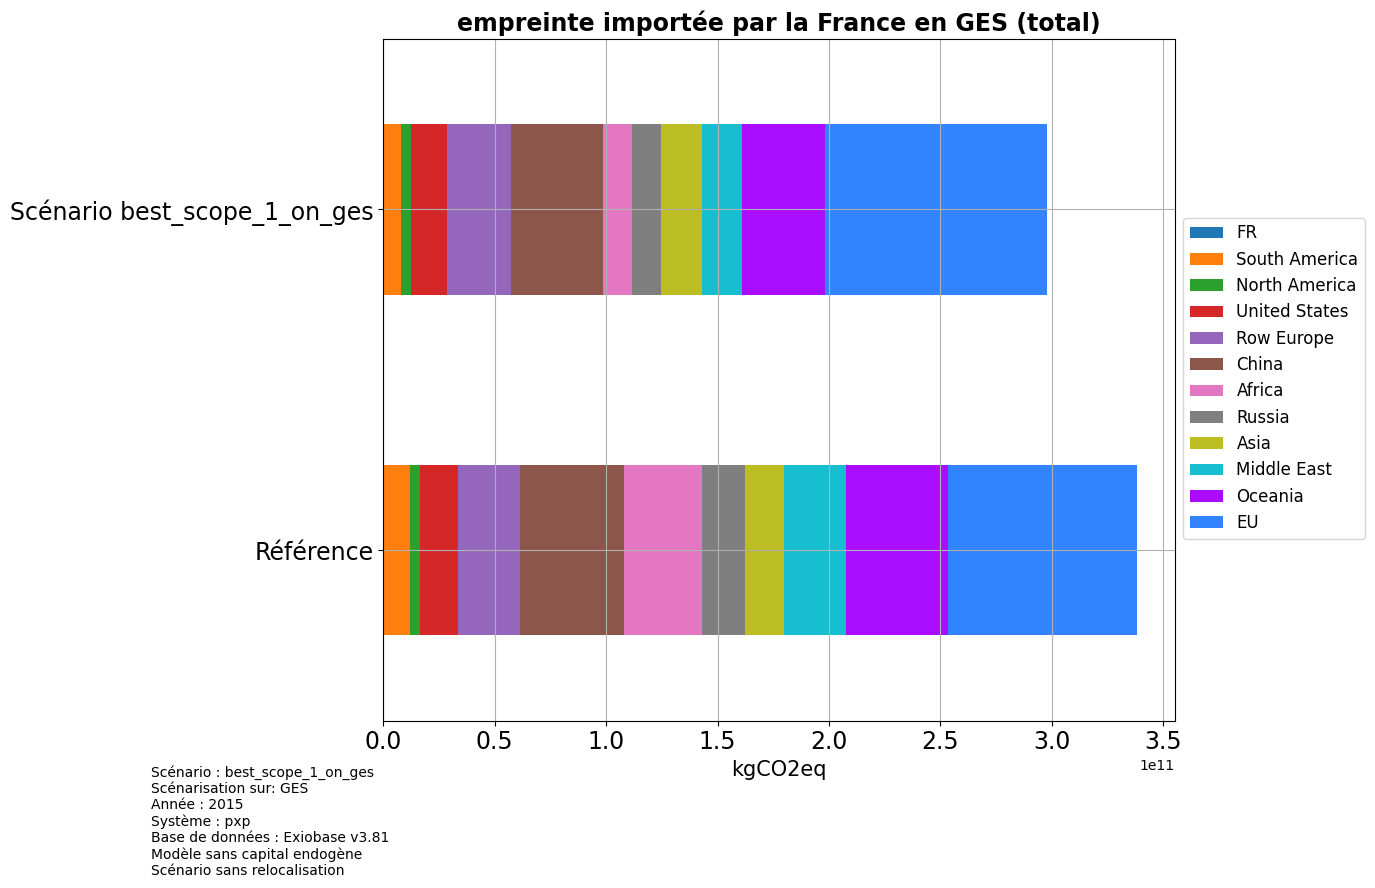

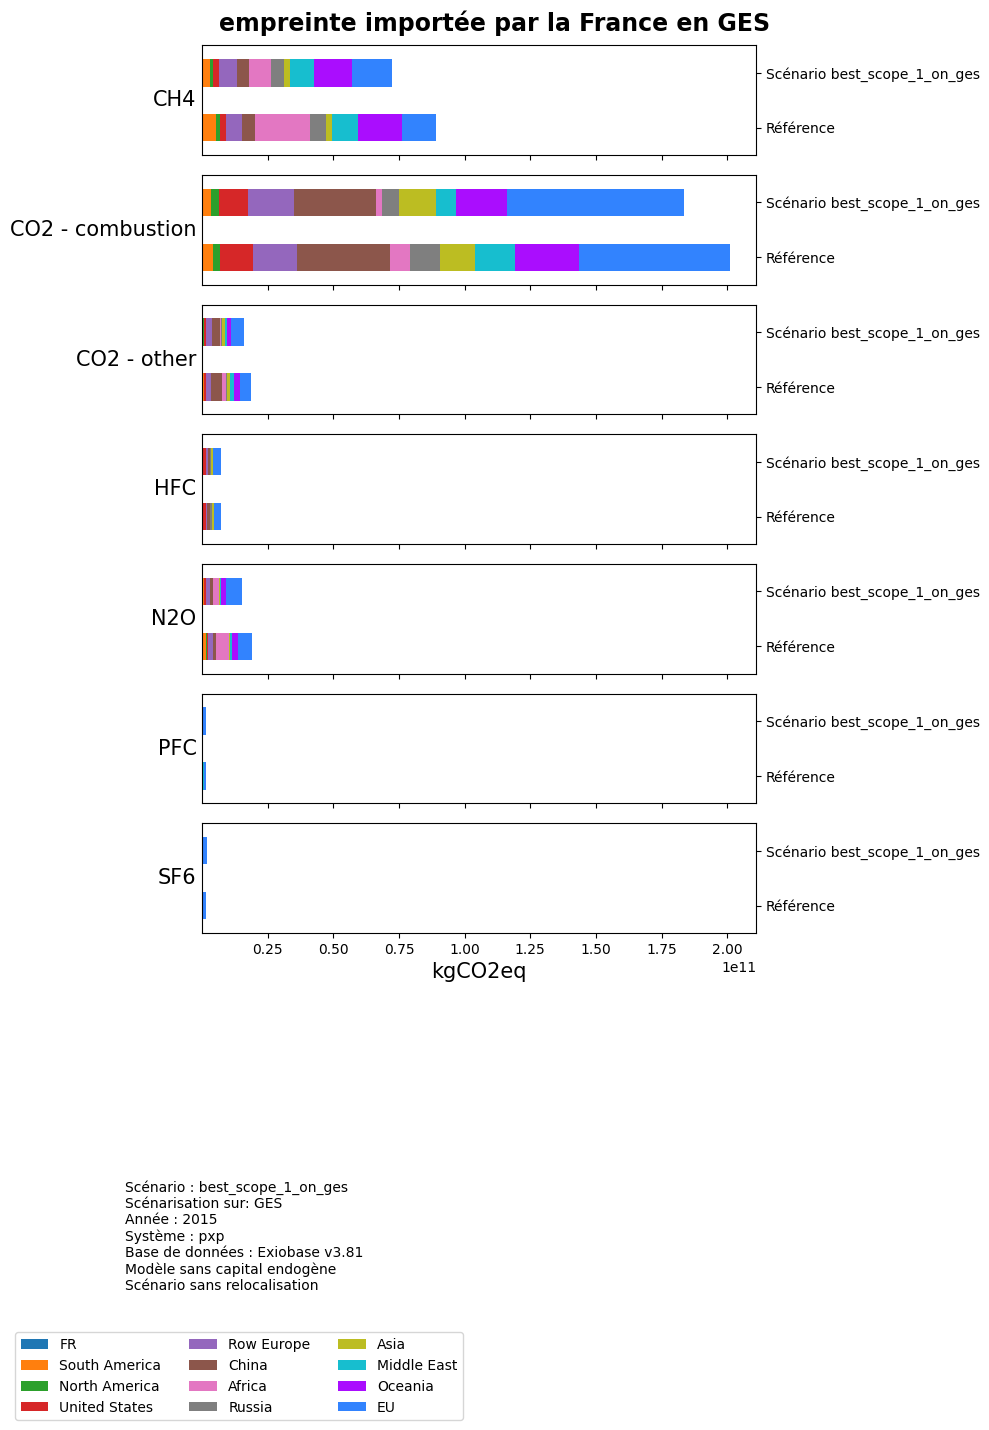

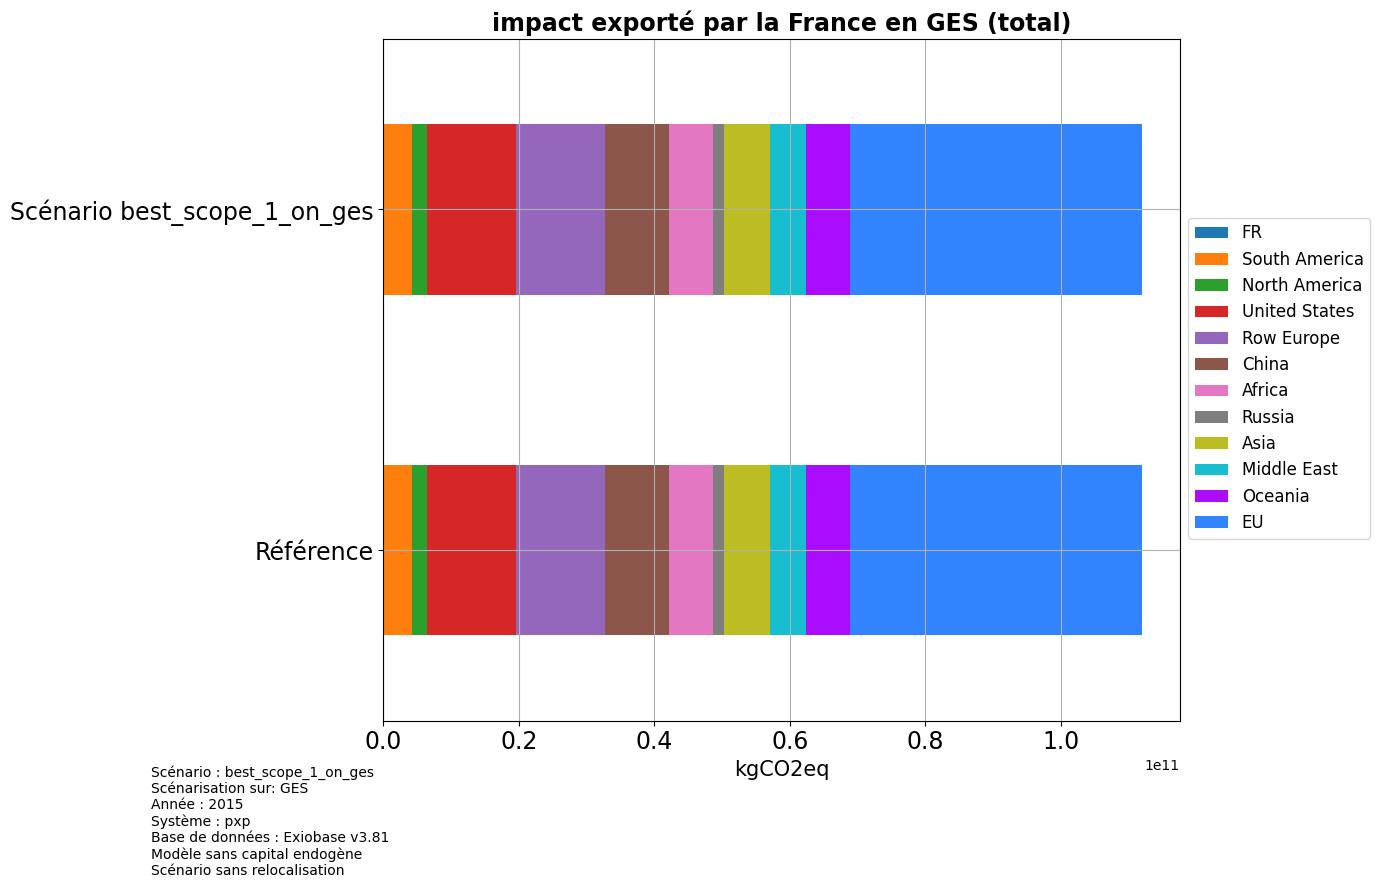

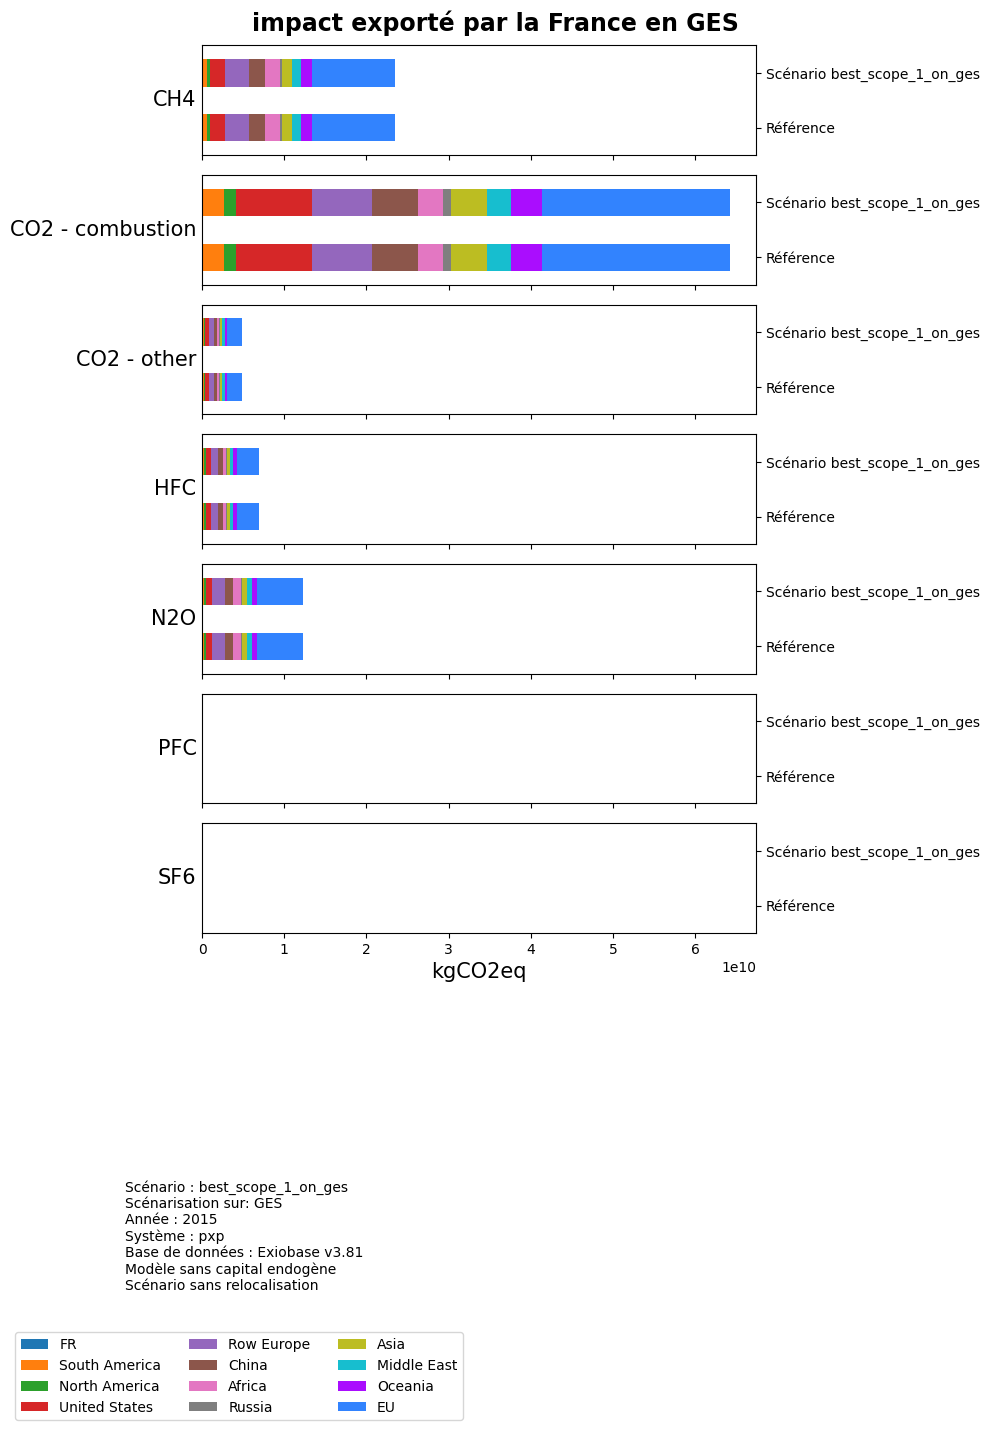

In [31]:
model.plot_substressor_synthesis("best_scope_1_on_ges", stressors_to_display='GES')

Pour appeler une méthode sur l'ensemble des scénarios chargés dans l'objet `Model`, il suffit d'exécuter la méthode suffixée par `_all`. Exemple:

In [101]:
#model.plot_trade_synthesis_all()
#model.plot_stressor_synthesis_all('GES')
#model.plot_substressor_synthesis_all('GES')

## plot_all(stressors_to_display) lance toutes les méthodes précédentes d'un seul coup.
#model.plot_all('GES')

Toutes les figures créées par les méthodes précédentes sont enregistrées dans un dossier `figures`/(model)/(scenario contrefactuel) ou bien diectement dans le dossier `figures`/(model) quand on travaille sur la référence.

#### Comparaison entre scénarios, pour un produit et un stressor donnés

Deux autres méthodes permettent d'afficher simultanément les impacts environnementaux agrégés des importations d'une production donnée par une région donnée dans tous les scénarios d'un même modèle: 
   - soit selon la **localisation géographiques des impacts**: méthode `plot_impacts_by_location_for_one_product()`, dans laquelle les impacts induits tout au long de la chaine de production d'un bien importé sont **attribuées à la région où ils ont réellement eu lieu**). L'argument `option` détermine la méthode de calcul des importations: **'final demand'** pour représenter l'empreinte importée d'un bien de demande finale, directement extraite de l'indicateur D_imp du module pymrio, ou **'total imports'** pour calculer l'impacts des importations comme dans le formalisme SRIO (impact des inputs intermédiaires et de la demande finale confondus).
   
   - soit selon **l'origine d'approvisionnement des biens**: méthode `plot_impacts_by_exporting_country_for_one_product()`, dans laquelle les impacts des importations sont **attribués au dernier exportateur du bien**. On peut choisir de représenter:
           --> soit les impacts directs à l'étranger de la production d'un bien importé (à l'aide du stressor S), y compris la production des inputs importés nécesaires à la production des exportations françaises, en choississant `scope`=**1**.
           --> soit les impacts cumulés le long de la chaine de valeur d'un bien importé (à l'aide du stressor M=S.L), en choississant `scope`=**3** (ceux des importations françaises uniquement destinées à la satisfaction de la demande finale domestique du bien (exportations exclues)).

NB: plot_impacts_by_location_for_one_product(`option`='final demand') donne donc la même empreinte importée totale par produit que la méthode plot_stressor_synthesis(), et plot_impacts_by_location_for_one_product(`option`='total imports') donne la même empreinte importée totale par produit que plot_impacts_by_exporting_country_for_one_product(`scope`=3).

Pour ces deux méthodes: 
- l'argument `sector` est à choisir parmi tous les secteurs disponibles du modèle.
- l'argument `scenarios` permet de choisir une liste restreinte de scénarios chargés dans l'objet Model (`scenarios`=['scenario1', 'scenario2', 'scenario3', etc]. Par défaut, `scenarios`=None exécute la méthode sur l'ensemble des scénarios présents.)

Les figures créées par ces deux méthodes sont (respectivement) enregistrées dans des dossiers `Impacts_by_location_for_(region)` et  `Impacts_per_exporting_regions_to_(region)`. /!\ Les exécutions successives de ces deux méthodes avec seulement une liste différente de scénarios écrasent les précédentes figures du même nom.

In [ ]:
## Pour rappel:
print("Liste des secteurs : \n", model.sectors)

In [37]:
model.plot_impacts_by_exporting_country_for_one_product(sector="Clothing",country_importing="FR",stressors_to_display='GES',scenarios=None,scope=3)
model.plot_impacts_by_location_for_one_product('Clothing',country_importing="FR",stressors_to_display='GES', scenarios=None, option='MRIO')


## 5. Améliorer la lisibilité des figures

Pour améliorer la lisibilité des figures, il est possible d'agréger les régions entre elles et/ou les secteurs entre eux. Pour cela, il suffit de renseigner les attributs `regions_mapper` et/ou `sectors_mapper` dans l'objet `Model`. Il est attendu des dictionnaires d'appariement similaires aux exemples `REGIONS_AGG` et `SECTORS_AGG` fournis dans le fichier `src/settings.py`. 

Pour retirer cette agrégation, il suffit d'affecter la valeur `None` aux attributs `regions_mapper` et/ou `sectors_mapper`.

Cette fonctionnalité n'est pas disponible pour les méthodes `plot_impacts_by_exporting_country_for_one_product` et `plot_impacts_by_location_for_one_product`.

_Remarque :_ plusieurs attributs de l'objet `Model` sont automatiquement modifié lorsque `regions_mapper` ou `sectors_mapper` sont modifiés par l'utilisateur, l'utilisateur n'a pas à s'en occuper.

**/!\\** Ces nouvelles figures écraseront les éventuelles figures créées précédemment avec les mêmes paramètres mais une aggrégation de visualisation différente.


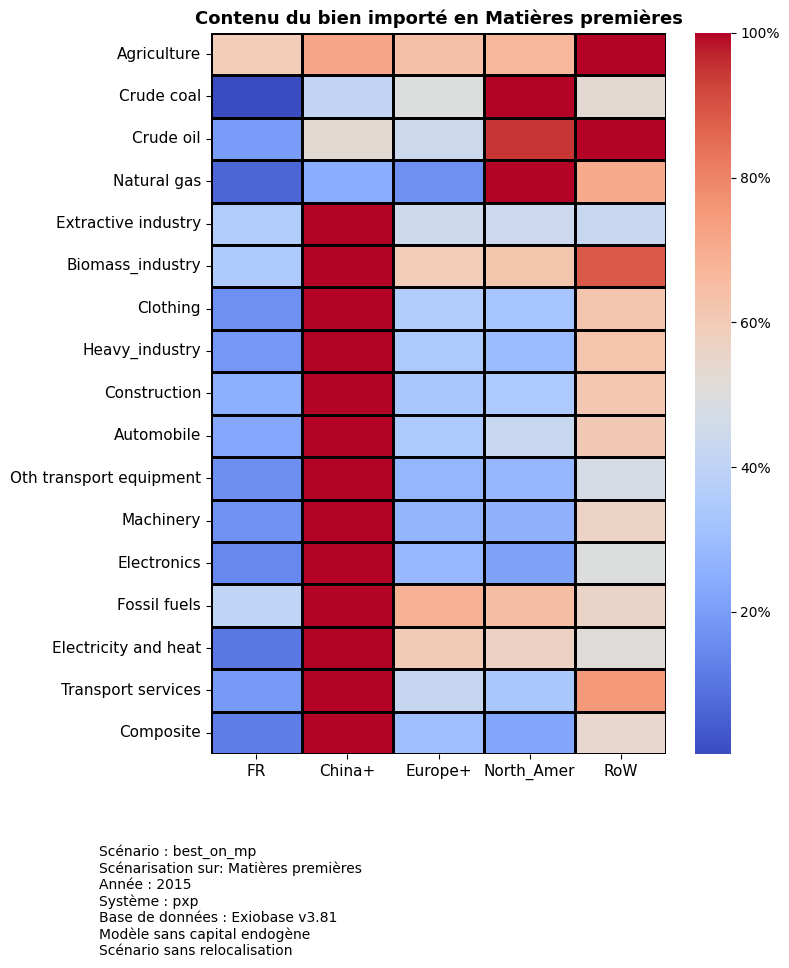

In [46]:
from main import REGIONS_AGG

model.regions_mapper = REGIONS_AGG
model.plot_stressor_content_heatmap("best_on_mp", 'Matières premières')

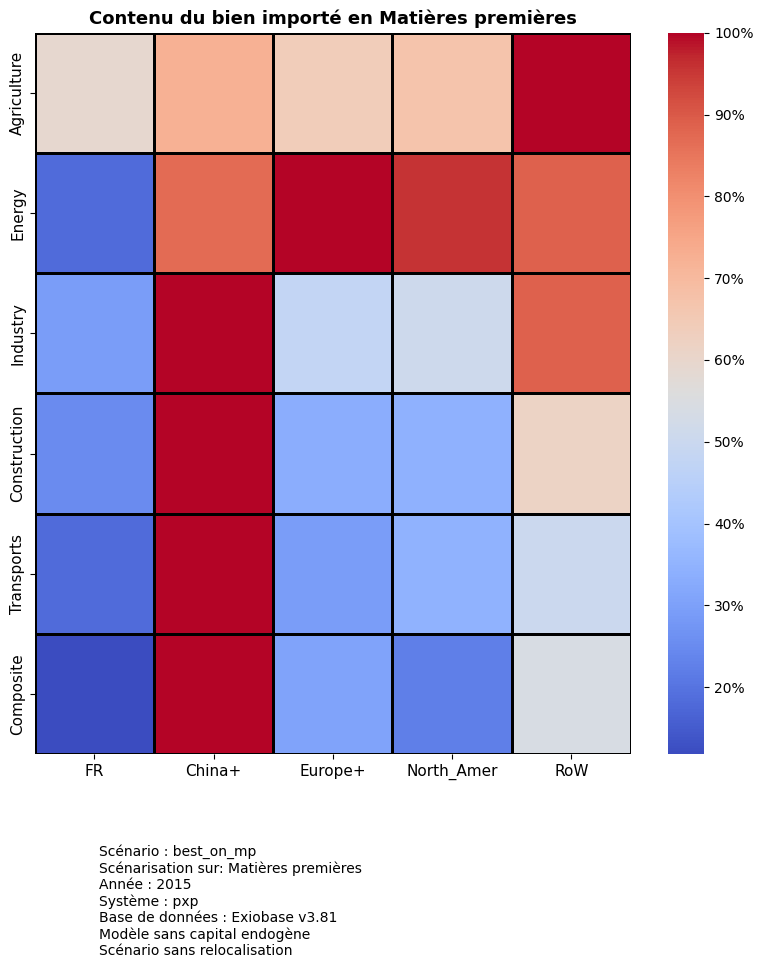

In [47]:
from main import SECTORS_AGG

model.sectors_mapper = SECTORS_AGG
model.plot_stressor_content_heatmap("best_on_mp", 'Matières premières')

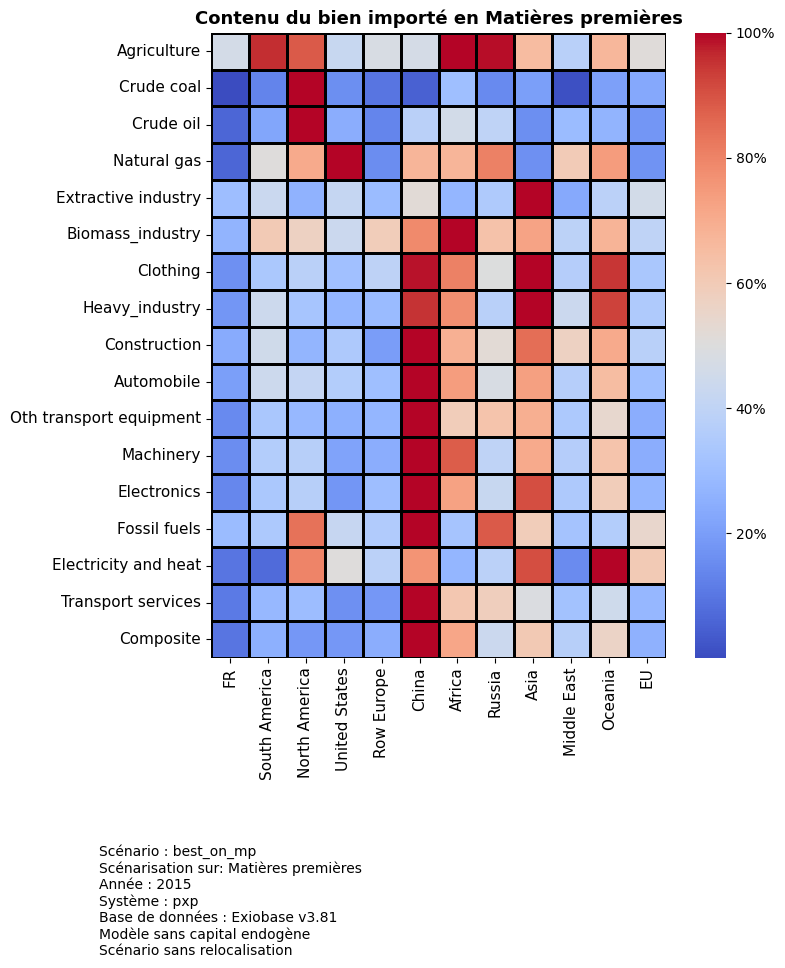

In [48]:
model.regions_mapper = None
model.sectors_mapper = None
model.plot_stressor_content_heatmap("best_on_mp", 'Matières premières')

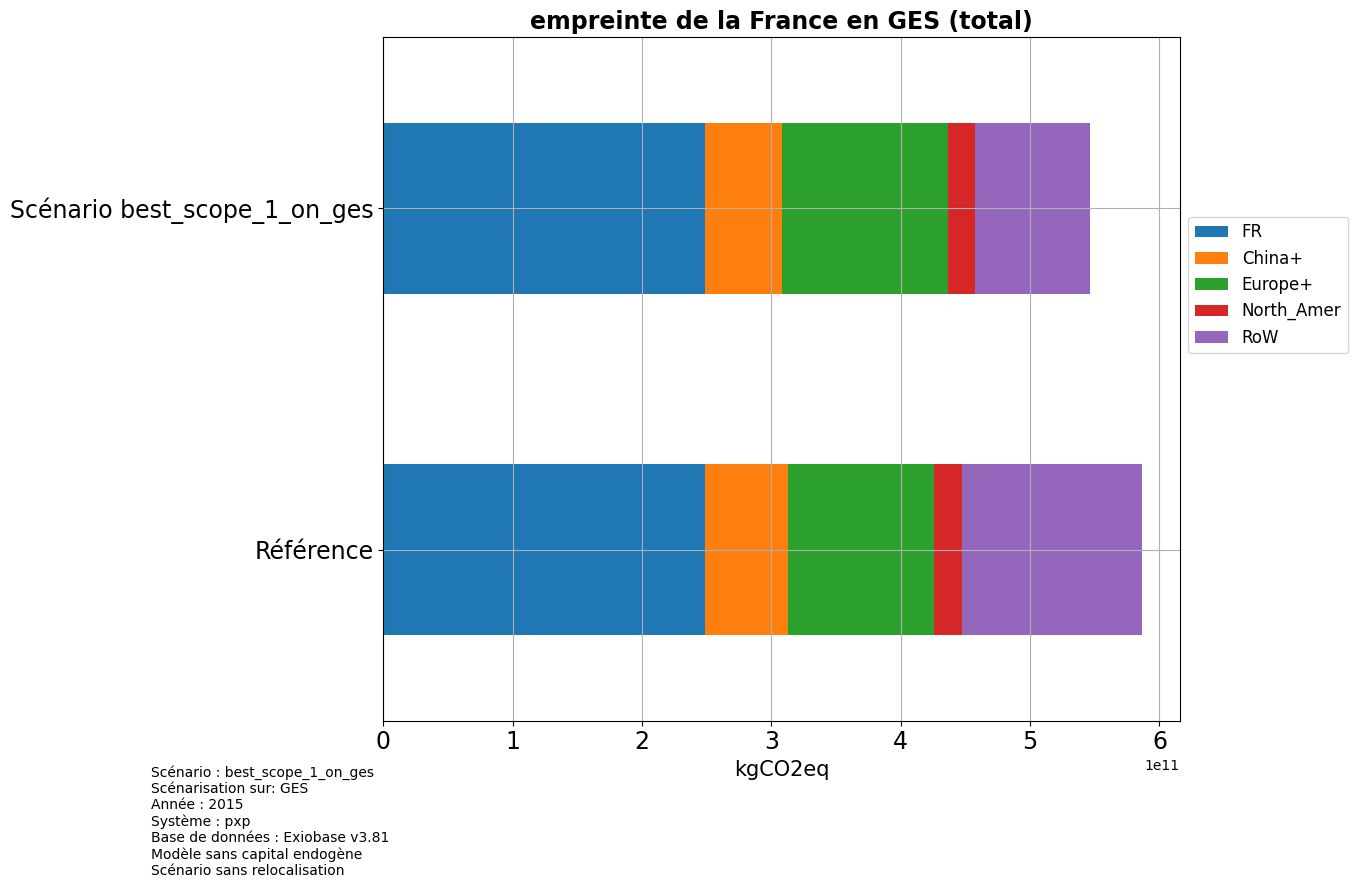

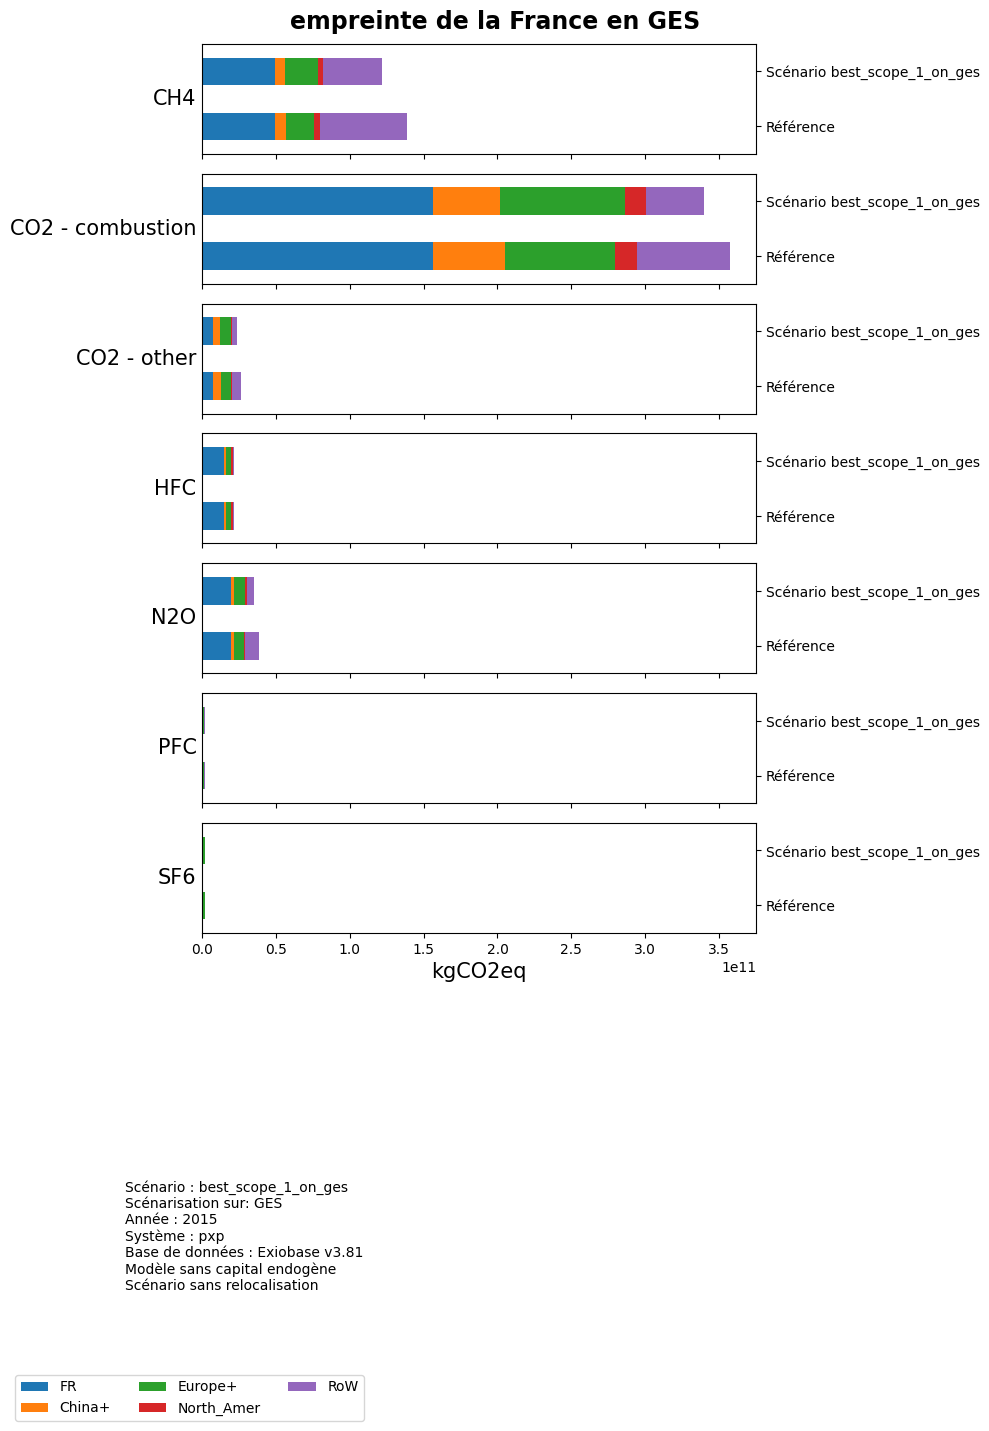

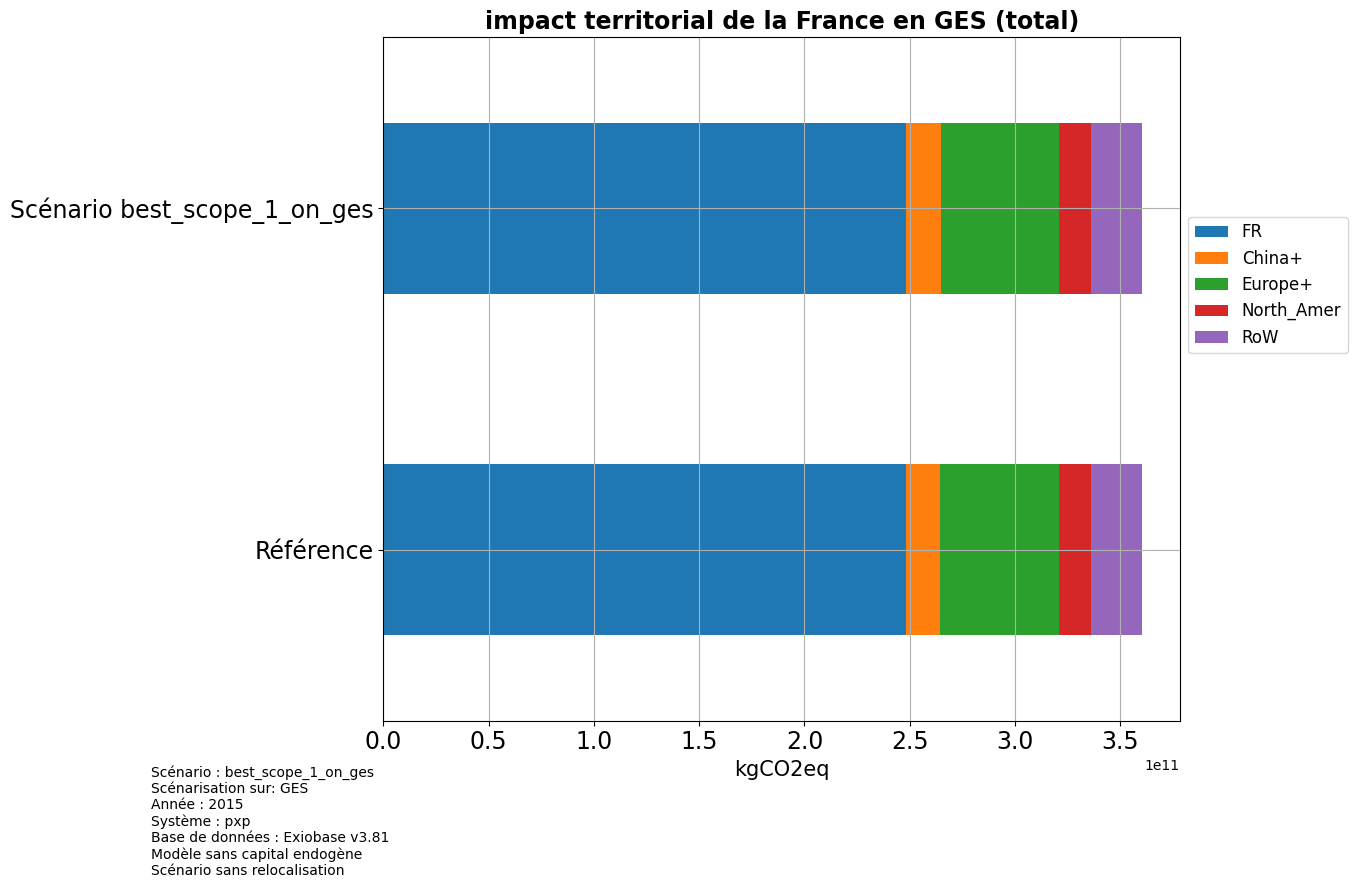

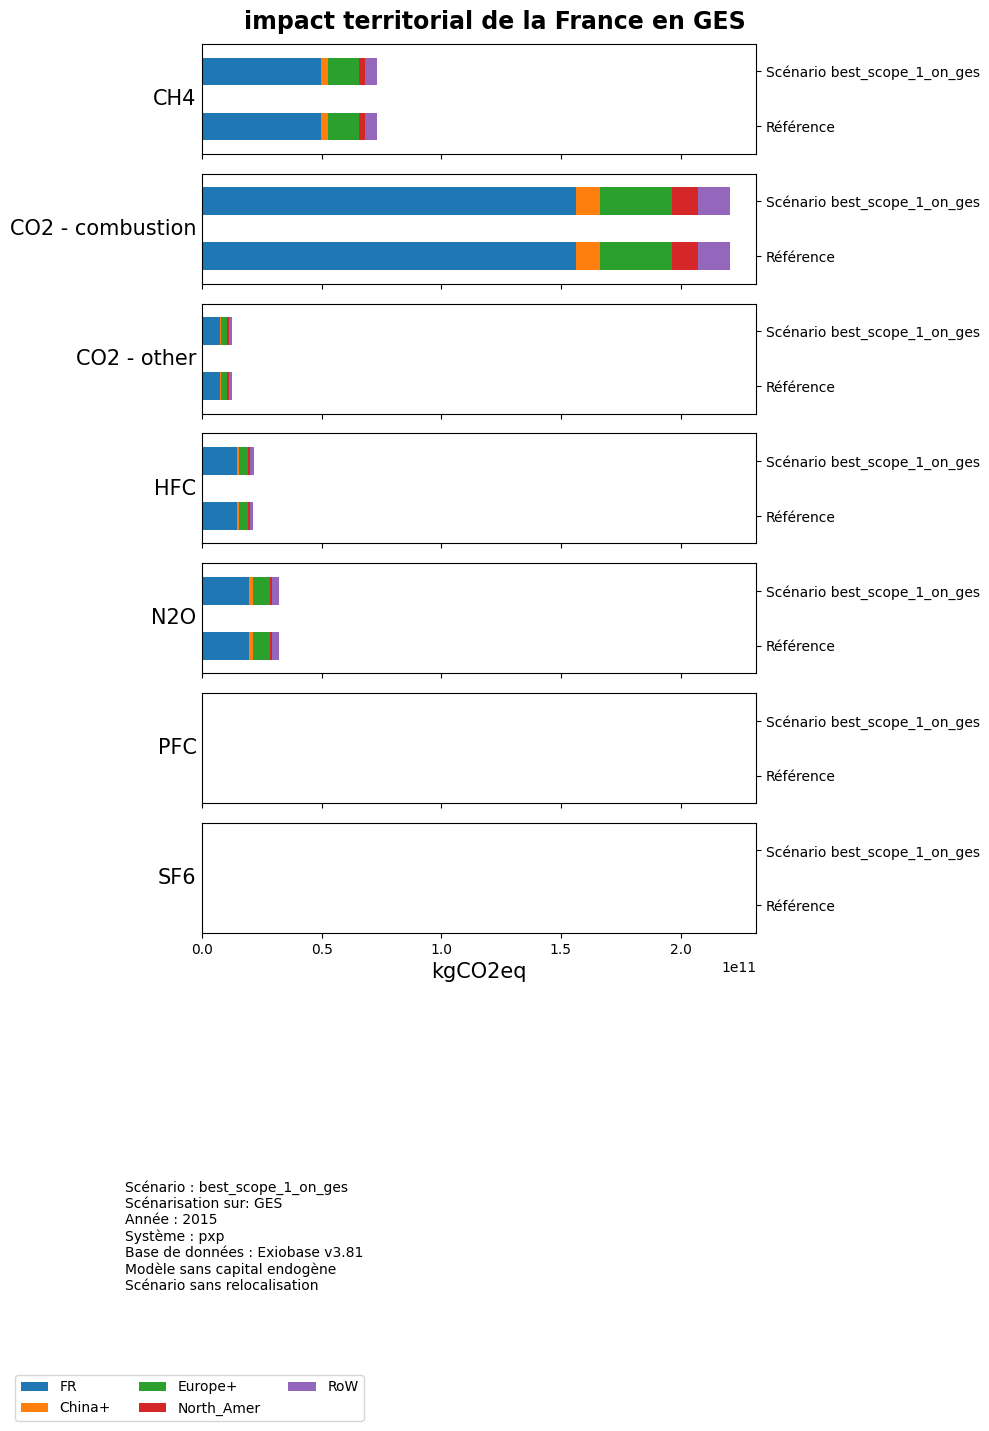

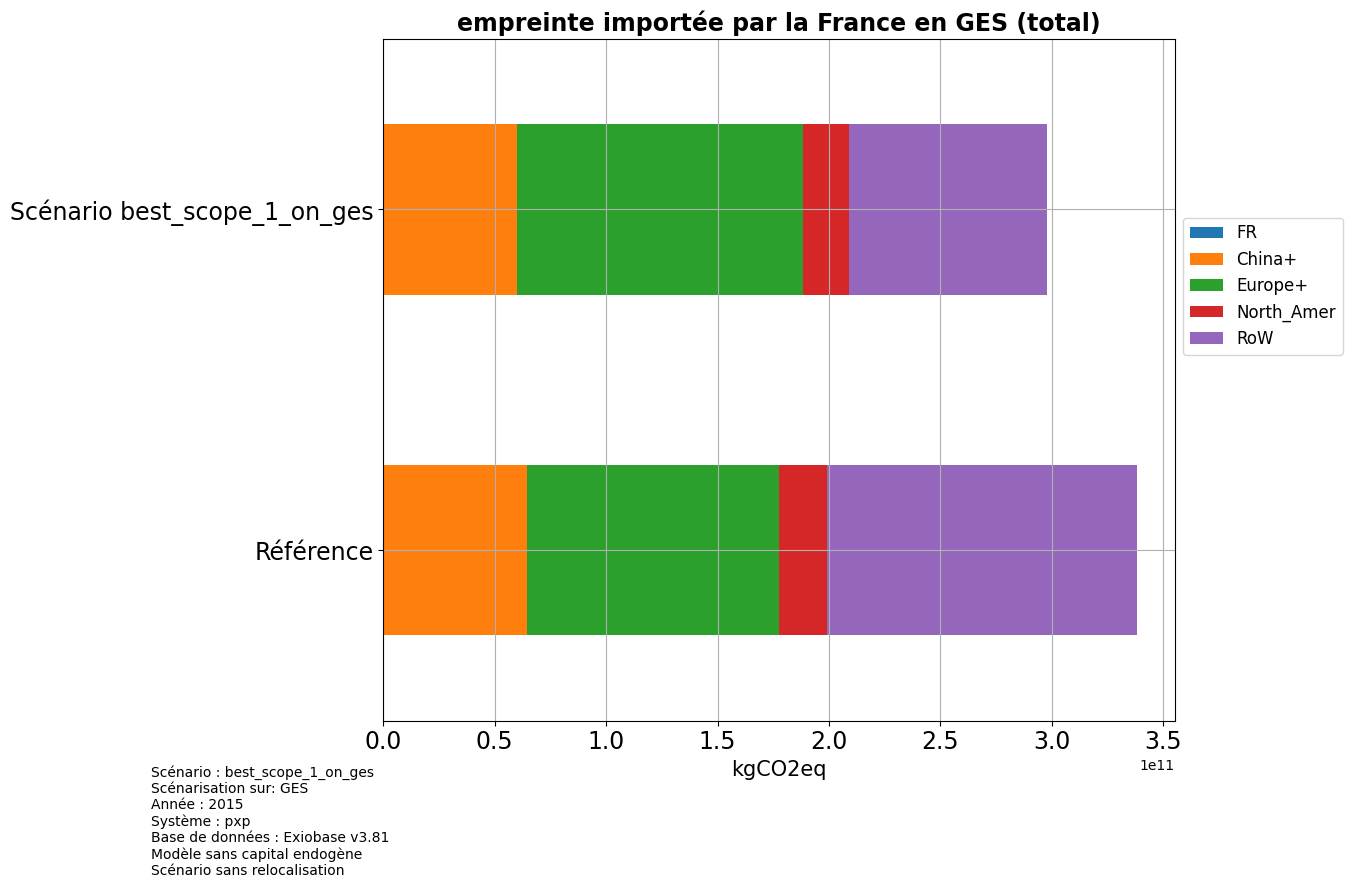

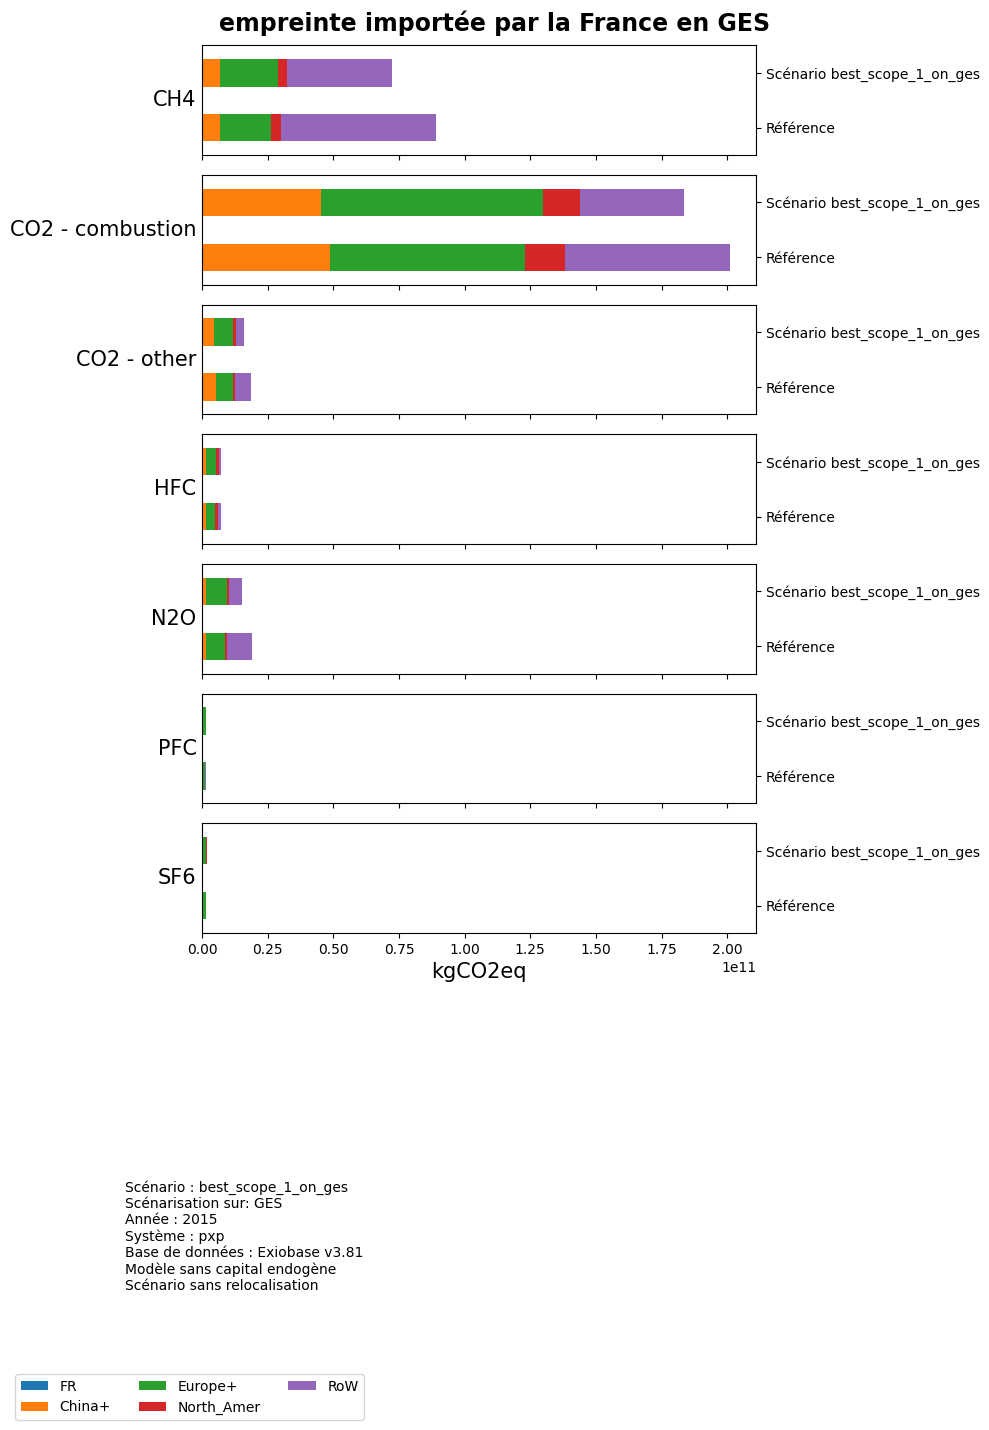

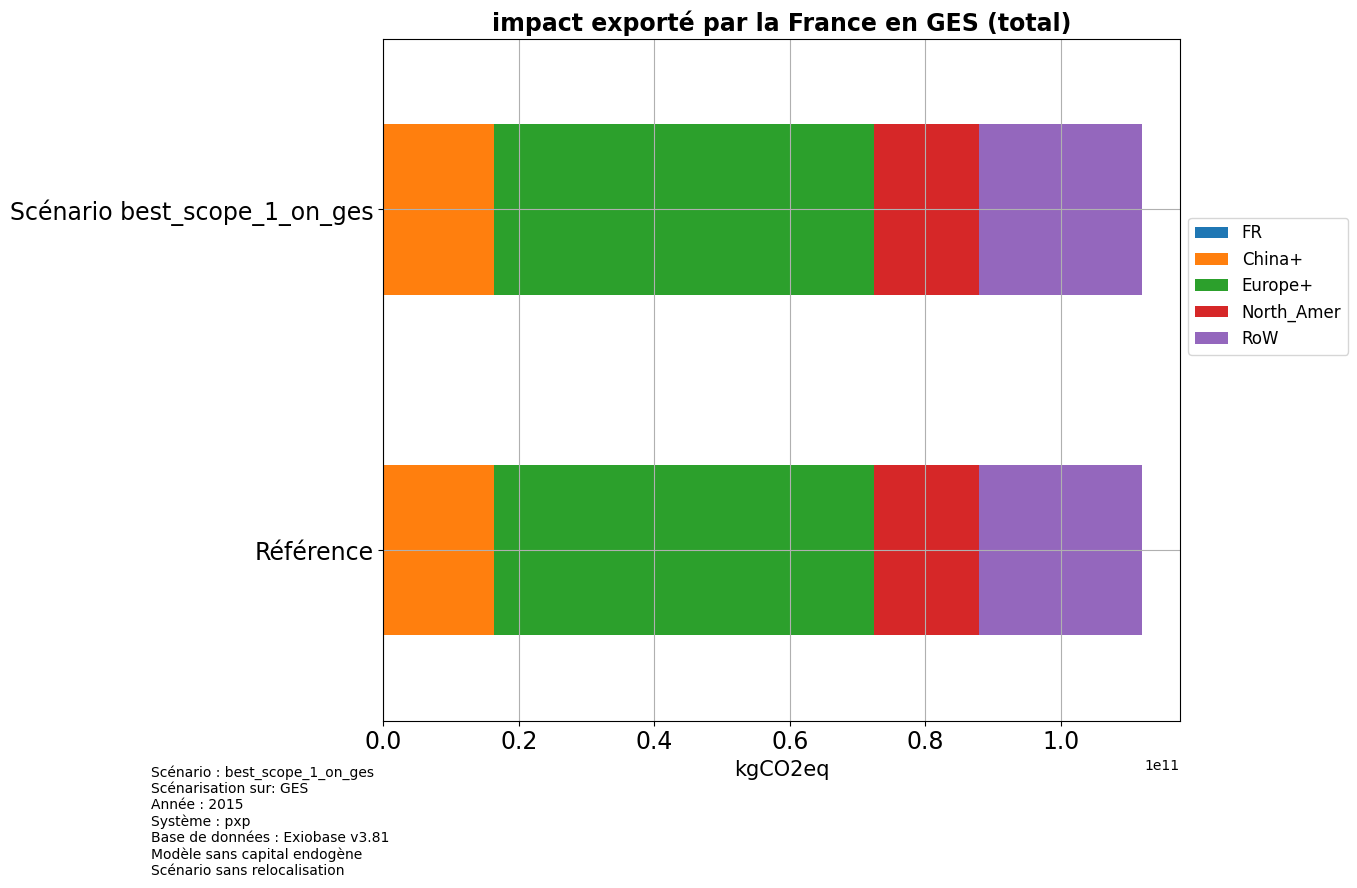

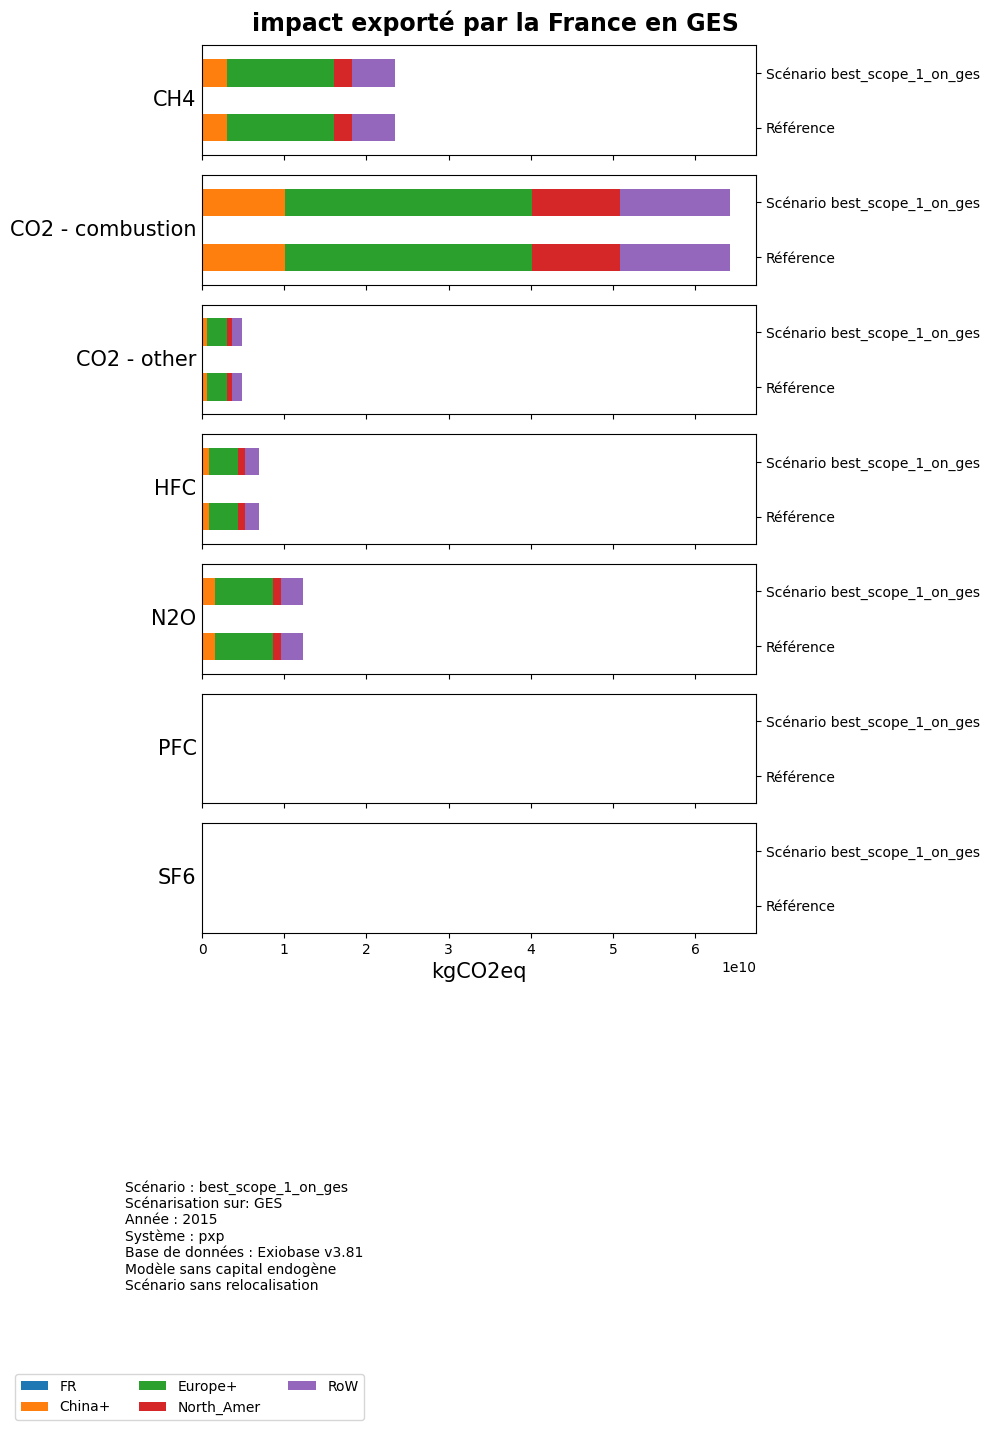

In [50]:
model.regions_mapper = REGIONS_AGG
model.sectors_mapper = SECTORS_AGG
model.plot_substressor_synthesis('best_scope_1_on_ges',stressors_to_display='GES')

## 6. Endogénéisation de la consommation de capital 
## (non fonctionnel, tests à faire)

Pour endogénéiser la consommation de capital par les différents secteurs, il suffit d'ajouter `capital=True` lors de la création d'un nouveau modèle. Le programme télécharge alors la base de données de consommation de capital et crée le modèle associé.

In [ ]:
model_cap = Model(capital=True)

In [ ]:
model_cap.iot.Z

In [ ]:
from src.utils import load_Kbar
load_Kbar(year=model_cap.base_year,
                system=model_cap.system,
                path=model_cap.capital_consumption_path,
            )

On peut alors utiliser le modèle exactement comme précédemment.

In [ ]:
model_cap.plot_footprint_FR()

La fonction `endogenous_capital_comparison` du fichier `main.py` permet de comparer les composantes de l'empreinte carbone d'une région au cours des années, avec ou sans endogénéisation du capital. Attention, si les modèles n'ont jamais été chargés, elle peut prendre du temps (compter ~10 minutes par année). Sinon, elle ne prend que quelques secondes.
À la différence des autres fonctions d'édition de figures, cette fonction renvoie un dictionnaire contenant les modèles chargés, pour les traiter plus facilement par la suite.

In [ ]:
from main import endogenous_capital_comparison

endogenous_capital_comparison(start_year=2012, end_year=2015)

## 7. Construction des fichiers CoefRoW.xlsx pour MatMat

La commande `save_CoefRoW` permet de calculer et d'enregistrer les coefficients d'impacts environnementaux indirects des importations d'une région donnée dans un fichier excel *CoefRow_{model.name}.xlsx* dans le dossier `outputs/CoefRoW/`.

Cette méthode nécessite de fournir en argument le nom du fichier excel (sans l'extension ".xlsx") où se trouve les données SRIO calibrées par MatMat au même niveau d'agrégation que l'objet model considéré, et préalablement placé dans le dossier `data/MatMat/`.

Dans l'argument `stressors_list` est attendu la liste des catégories de stressors dont on souhaite calculer les coefficients d'impact indirect. Les coefficients calculés seront agrégés au niveau de détail défini dans `STRESSORS_DICT_DEF`, et fournis en valeur absolue ainsi qu'en variation relative par rapport à la référence.

In [6]:
## on peut recalibrer un modèle au niveau d'agrégation "MTOC" (=Transitions) pour profiter du fichier SRIO_FR_2015_Transitions 
model = Model(aggregation_name="MTOC", base_year=2015, system="pxp", stressor_subset="full", calib=False, capital=False, recalib_capital=False)
model.new_counterfactual(name="best_on_mp", scenar_function=DICT_SCENARIOS["best"], scenar_stressors='Matières premières')
model.new_counterfactual(name="best_scope_3_on_ges", scenar_function=DICT_SCENARIOS["best"], scope=3, scenar_stressors='GES')

In [5]:
model.save_CoefRoW(region = "FR", SRIO_filename = 'SRIO_FR_2015_Transitions', stressors_list = ['GES', 'Matières premières', 'Minerais métalliques'])

Dans le cas où, après calibration d'un modèle et création de scénarios, on souhaite modifier la variable `STRESSORS_DICT_DEF` pour redéfinir des catégories d'extensions plus propices au calcul des coefficients, on peut enregistrer les modificactions en procédant de la sorte (en s'assurant néanmoins que toutes les nouvelles catégories de stressors sont bien incluses dans les extensions calibrées !!):

In [10]:
New_categories = {
        "GES_MatMat" : {"dict" : ["CO2 - combustion", "CO2 - other", "CH4", "N2O"],
                        "unit" : "kgCO2eq",
                        "name_EN" : "GHG_MatMat"
                       },
        # "other_new_category" : {...},
        }
src.model.STRESSORS_DICT_DEF.update(New_categories)
src.model.STRESSORS_DICT_DEF

In [13]:
model.save_CoefRoW(region = "FR", SRIO_filename = 'SRIO_FR_2015_Transitions', stressors_list = ['GES_MatMat', 'Matières premières'])